In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_table("./data/donnees_credit.txt", header=0, index_col=False, delimiter="\t", encoding="utf-8")

In [3]:
df

Typeclient    Age du client Situation familiale          Anciennete  \
0          bon   plus de 50 ans         celibataire    anc. plus 12 ans   
1          bon  moins de 23 ans         celibataire  anc. 1 an ou moins   
2      mauvais   de 23 a 40 ans                veuf  anc. de 6 a 12 ans   
3          bon   de 23 a 40 ans             divorce   anc. de 1 a 4 ans   
4          bon  moins de 23 ans         celibataire  anc. de 6 a 12 ans   
..         ...              ...                 ...                 ...   
463    mauvais   de 23 a 40 ans         celibataire  anc. 1 an ou moins   
464    mauvais   plus de 50 ans               marie  anc. 1 an ou moins   
465    mauvais   plus de 50 ans               marie  anc. 1 an ou moins   
466    mauvais   plus de 50 ans               marie    anc. plus 12 ans   
467    mauvais   de 40 a 50 ans               marie  anc. 1 an ou moins   

    Domiciliation du salaire Domiciliation de lepargne        Profession  \
0           domicile salaire              pas depargne           employe   
1           domicile salaire              pas depargne           employe   
2           domicile salaire              pas depargne           employe   
3           domicile salaire      moins de 10KF epargn           employe   
4       non dimicile salaire              pas depargne           employe   
..                       ...                       ...               ...   
463         domicile salaire      moins de 10KF epargn           employe   
464         domicile salaire              pas depargne             cadre   
465     non dimicile salaire              pas depargne           employe   
466         domicile salaire              pas depargne             cadre   
467         domicile salaire              pas depargne  profession autre   

         Moyenne en cours Moyenne des mouvements    Cumul des debits  \
0     de 2 a 5 KF encours     plus de 50KF mouvt  de 40 a 100 debits   
1     de 2 a 5 KF encours      moins 10 KF mouvt  moins de 40 debits   
2     de 2 a 5 KF encours     plus de 50KF mouvt  de 40 a 100 debits   
3    plus de 5 KF encours     de 30 a 50KF mouvt  de 40 a 100 debits   
4     de 2 a 5 KF encours     de 10 a 30KF mouvt  moins de 40 debits   
..                    ...                    ...                 ...   
463  moins de 2KF encours      moins 10 KF mouvt  de 40 a 100 debits   
464   de 2 a 5 KF encours      moins 10 KF mouvt  moins de 40 debits   
465   de 2 a 5 KF encours      moins 10 KF mouvt  moins de 40 debits   
466   de 2 a 5 KF encours     plus de 50KF mouvt  plus de 100 debits   
467   de 2 a 5 KF encours     de 30 a 50KF mouvt  moins de 40 debits   

    Autorisation de decouvert Interdiction de chequier  
0          decouvert interdit        chequier autorise  
1          decouvert interdit        chequier autorise  
2          decouvert autorise        chequier interdit  
3          decouvert interdit        chequier autorise  
4          decouvert interdit        chequier autorise  
..                        ...                      ...  
463        decouvert autorise        chequier autorise  
464        decouvert autorise        chequier interdit  
465        decouvert autorise        chequier autorise  
466        decouvert interdit        chequier autorise  
467        decouvert interdit        chequier autorise  

[468 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Typeclient                 468 non-null    object
 1   Age du client              468 non-null    object
 2   Situation familiale        468 non-null    object
 3   Anciennete                 468 non-null    object
 4   Domiciliation du salaire   468 non-null    object
 5   Domiciliation de lepargne  468 non-null    object
 6   Profession                 468 non-null    object
 7   Moyenne en cours           468 non-null    object
 8   Moyenne des mouvements     468 non-null    object
 9   Cumul des debits           468 non-null    object
 10  Autorisation de decouvert  468 non-null    object
 11  Interdiction de chequier   468 non-null    object
dtypes: object(12)
memory usage: 44.0+ KB


In [5]:
df.isnull().sum()

Typeclient                   0
Age du client                0
Situation familiale          0
Anciennete                   0
Domiciliation du salaire     0
Domiciliation de lepargne    0
Profession                   0
Moyenne en cours             0
Moyenne des mouvements       0
Cumul des debits             0
Autorisation de decouvert    0
Interdiction de chequier     0
dtype: int64

#### ATTENTION: il y a des duplicats

In [6]:
df.duplicated().sum()

28

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 467
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Typeclient                 440 non-null    object
 1   Age du client              440 non-null    object
 2   Situation familiale        440 non-null    object
 3   Anciennete                 440 non-null    object
 4   Domiciliation du salaire   440 non-null    object
 5   Domiciliation de lepargne  440 non-null    object
 6   Profession                 440 non-null    object
 7   Moyenne en cours           440 non-null    object
 8   Moyenne des mouvements     440 non-null    object
 9   Cumul des debits           440 non-null    object
 10  Autorisation de decouvert  440 non-null    object
 11  Interdiction de chequier   440 non-null    object
dtypes: object(12)
memory usage: 44.7+ KB


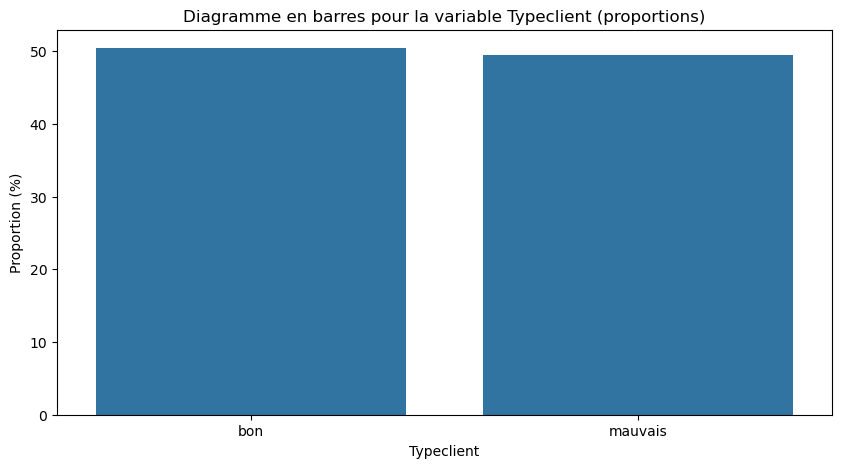

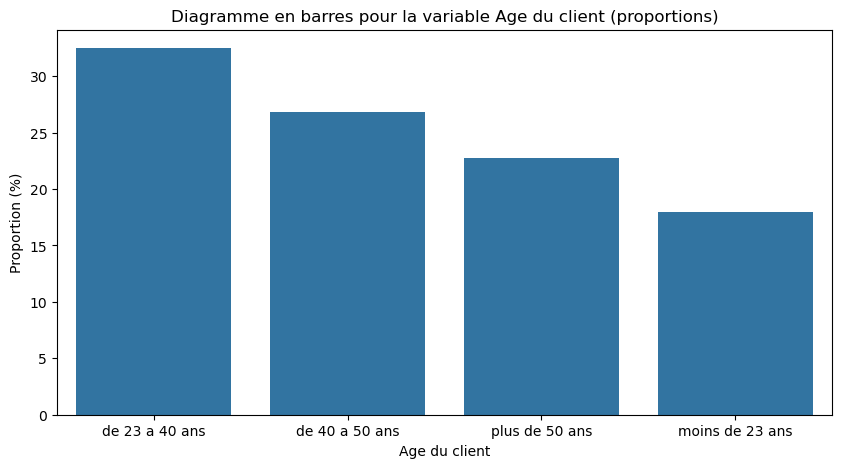

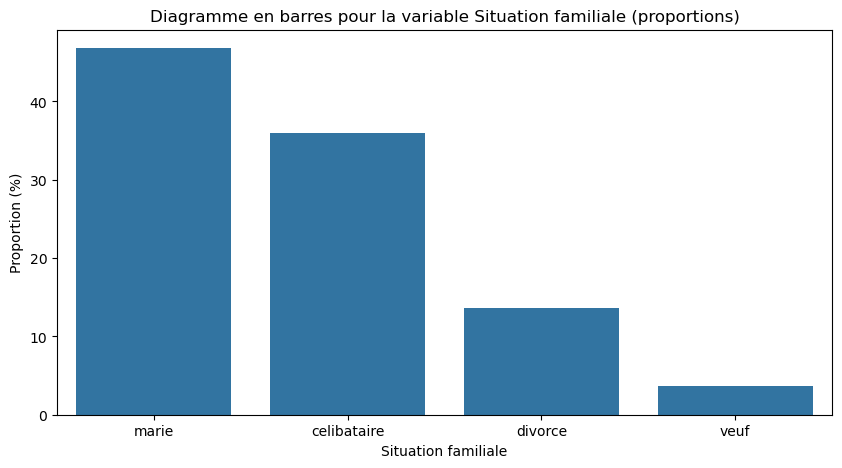

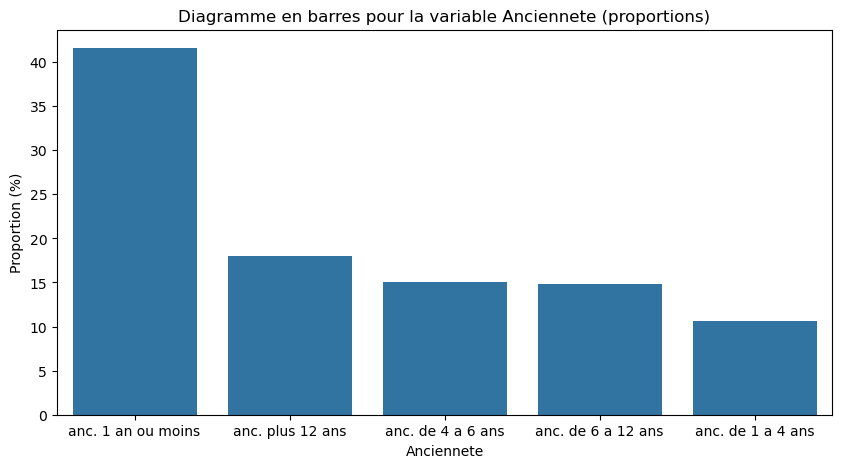

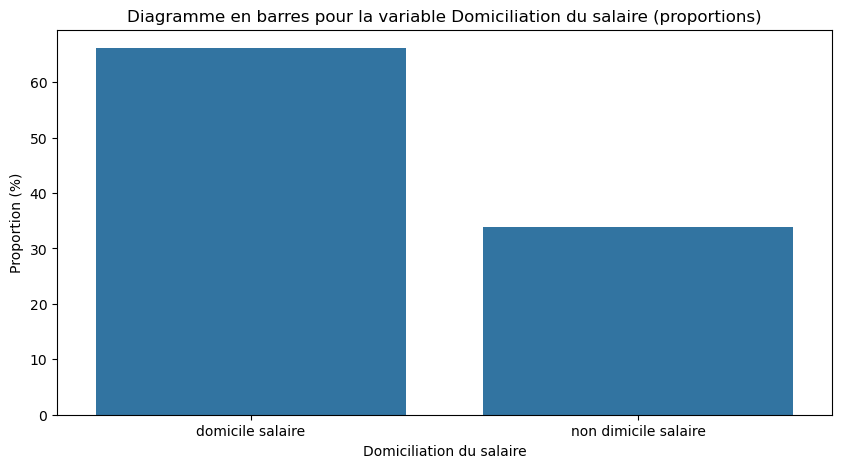

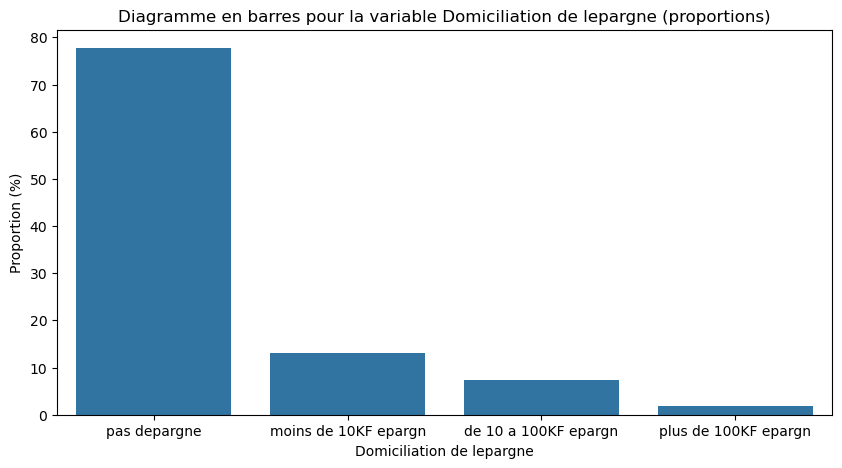

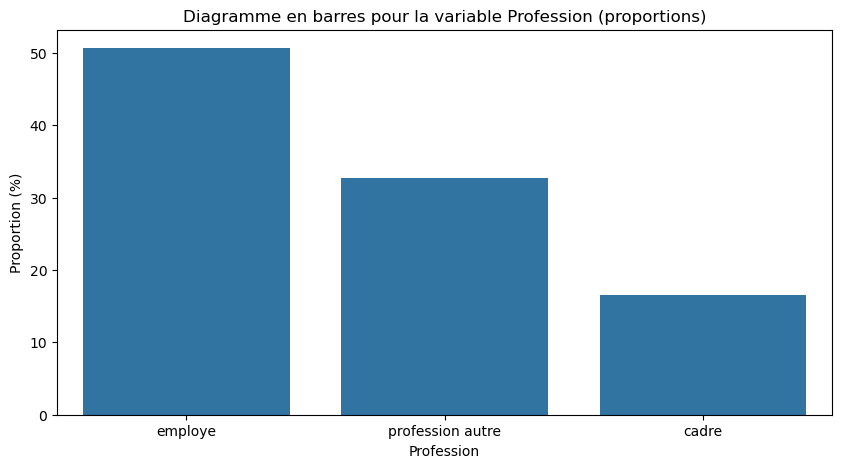

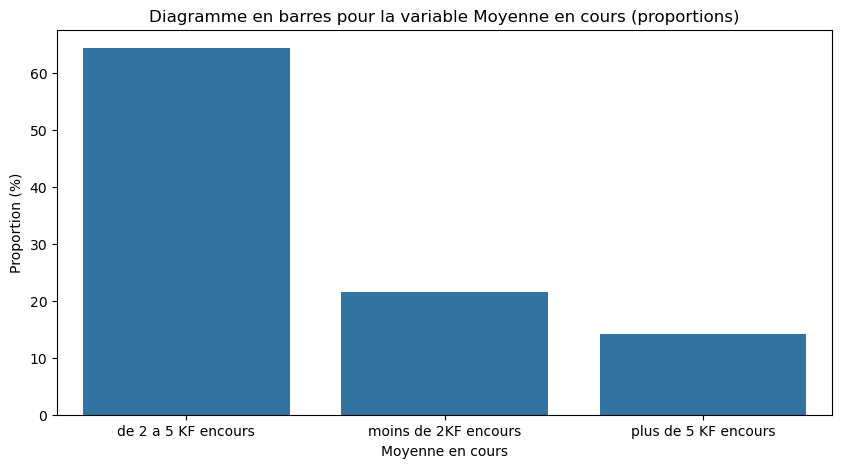

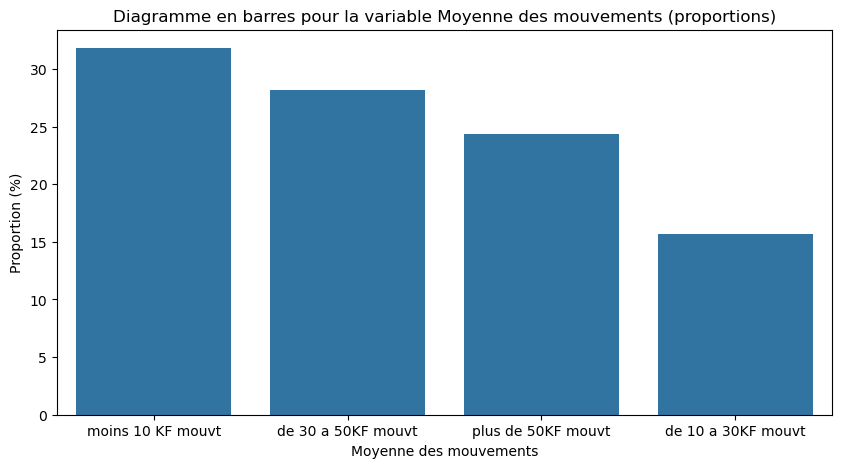

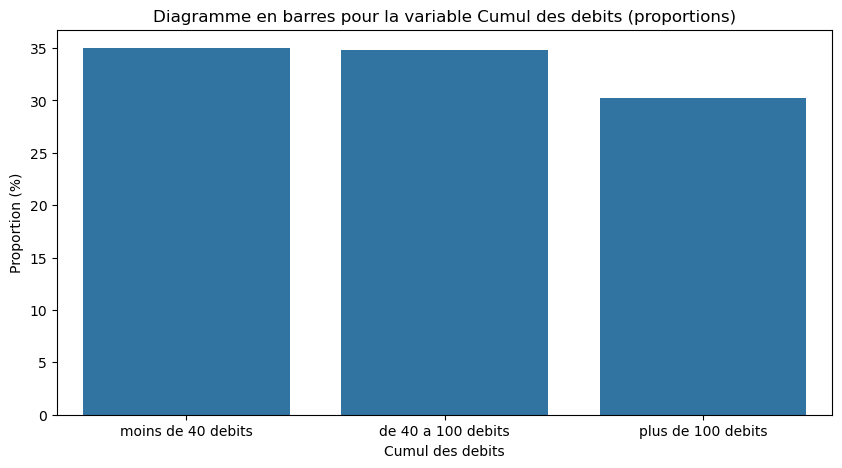

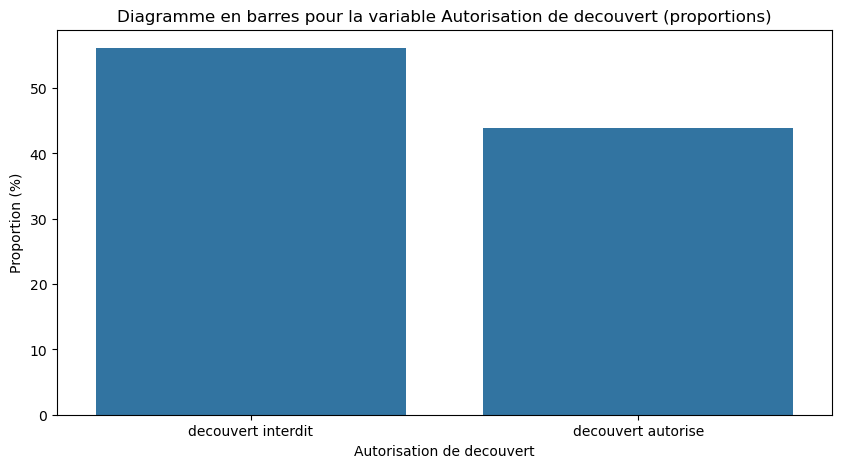

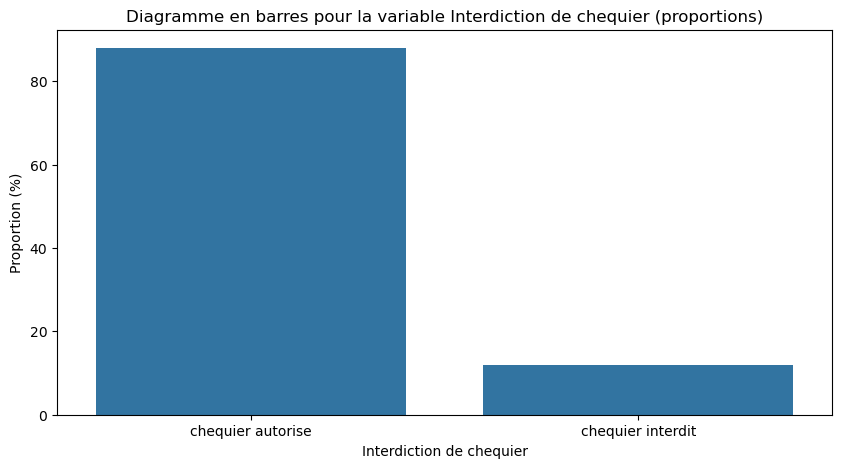

In [9]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    proportions = df[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

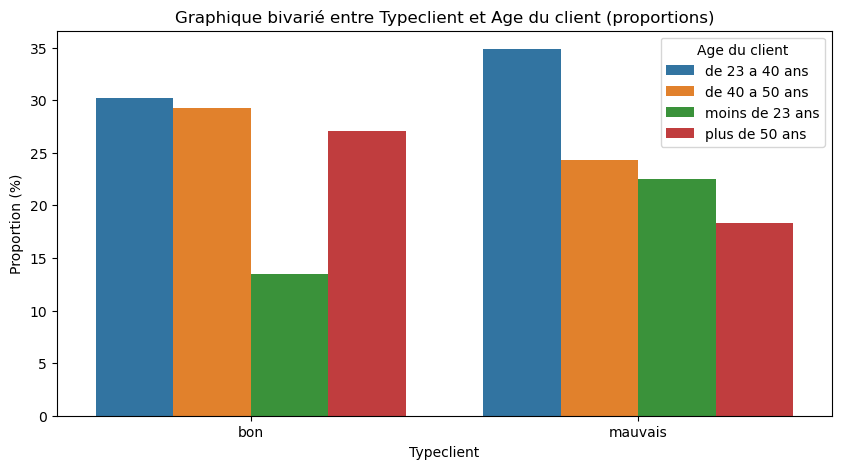

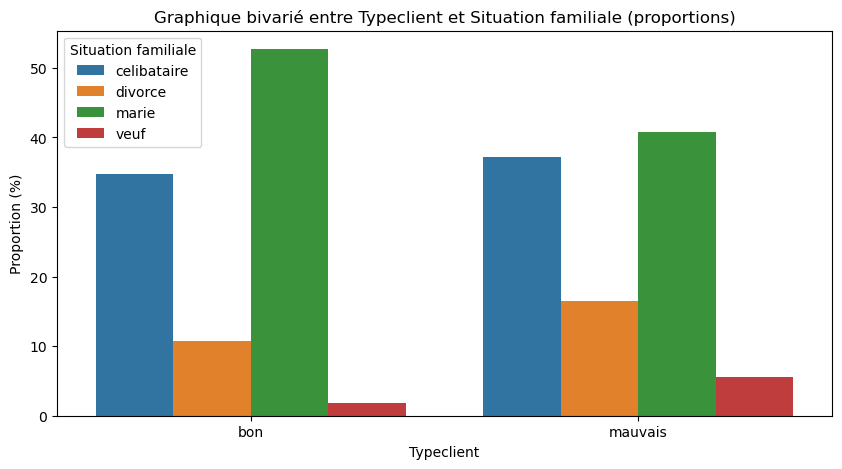

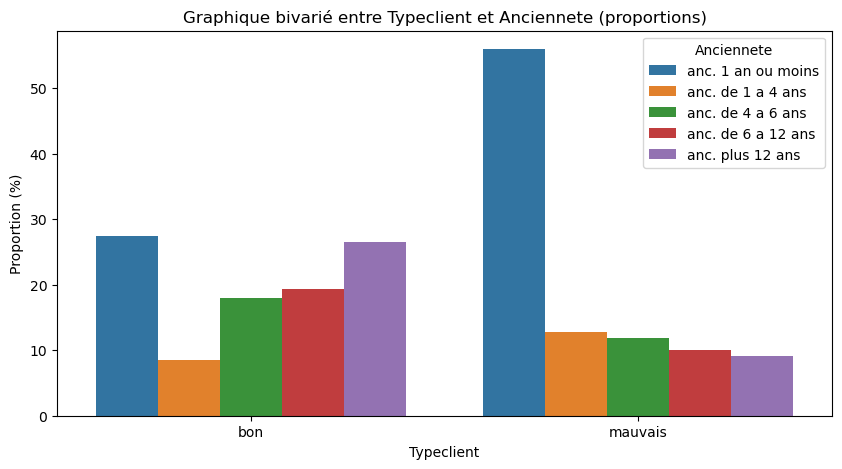

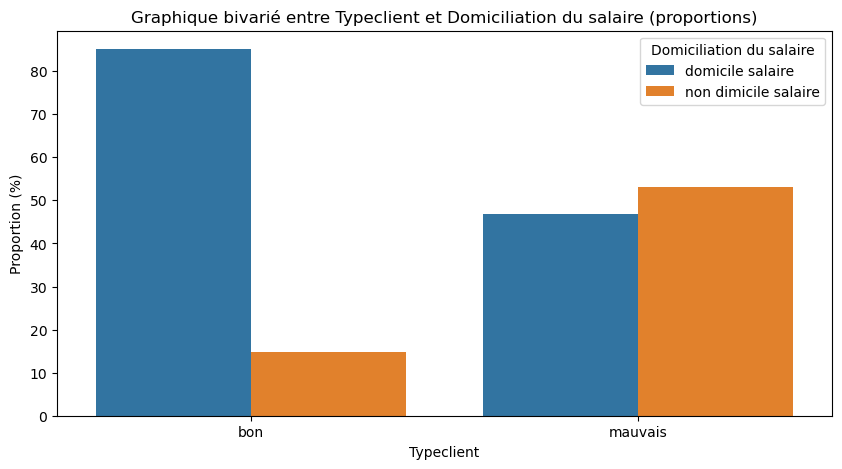

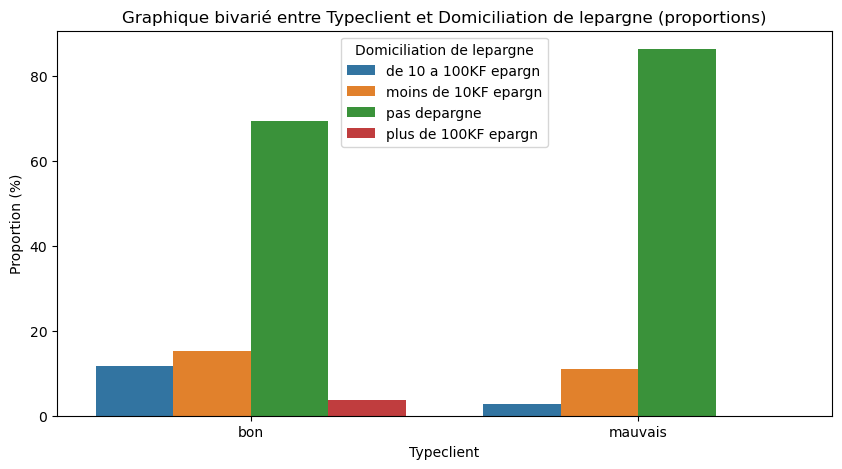

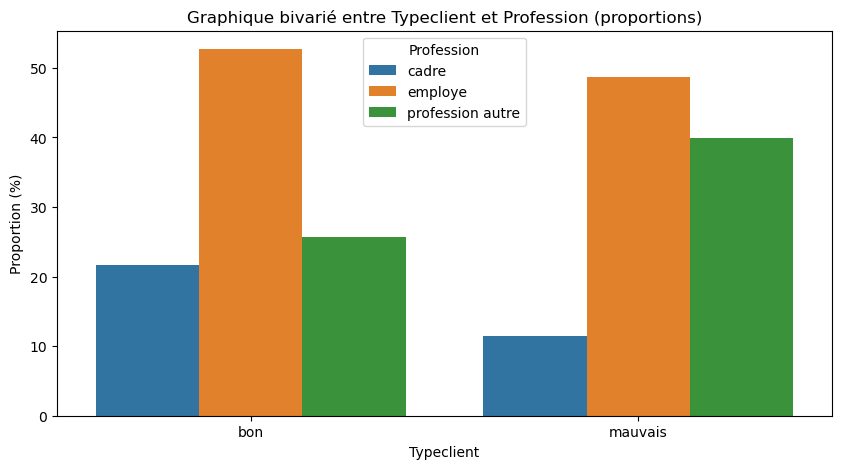

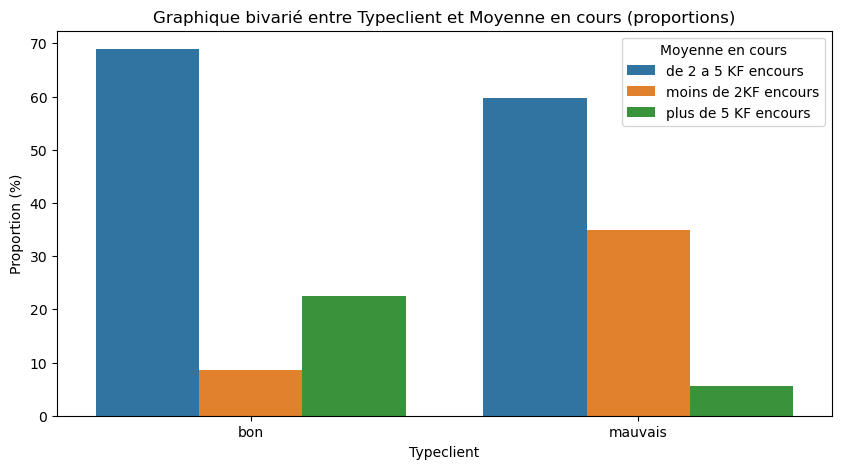

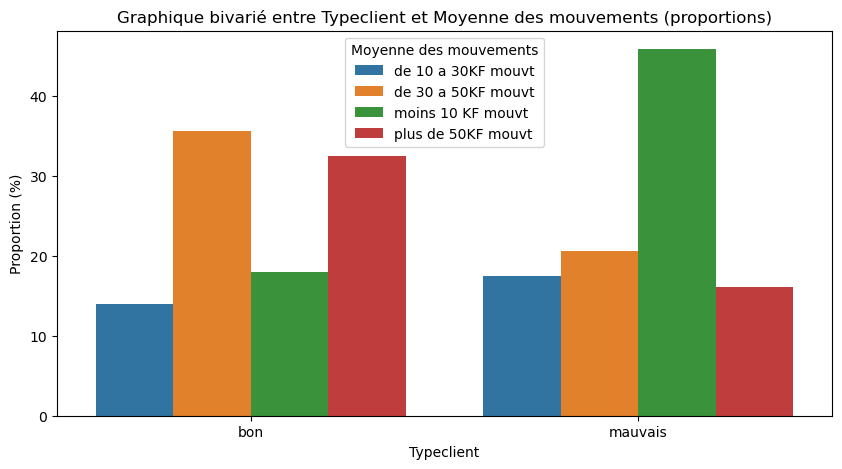

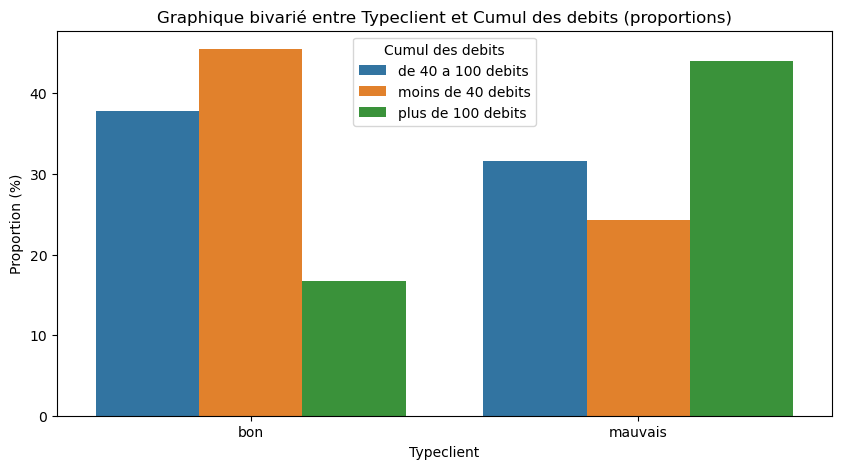

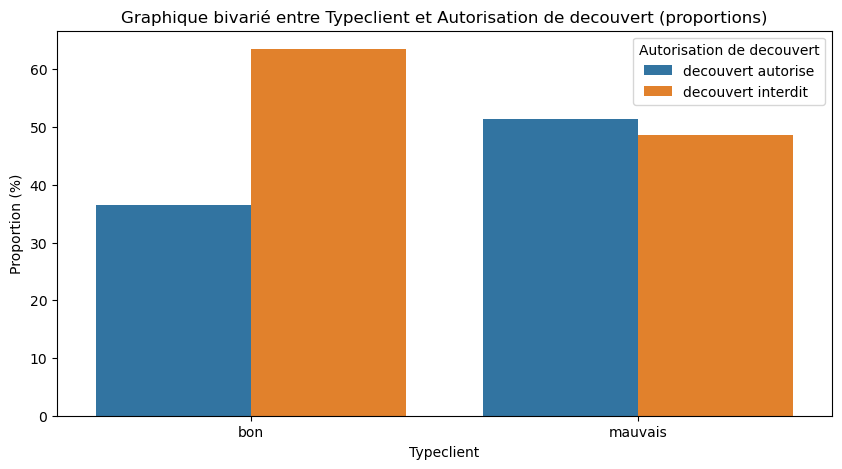

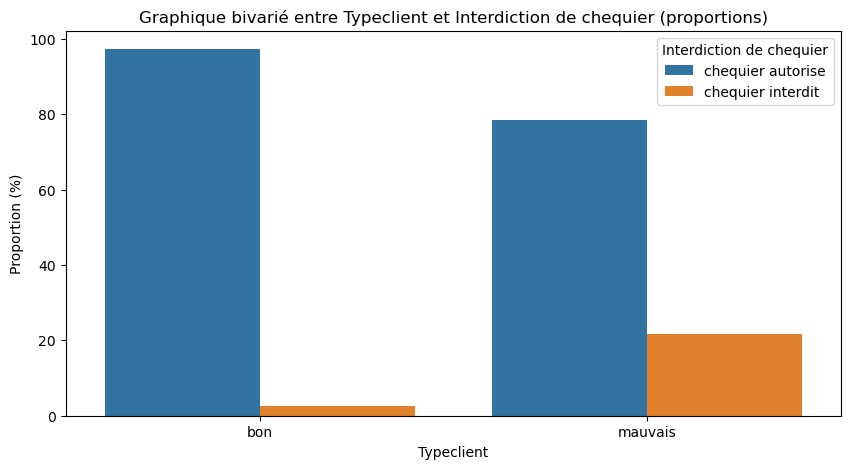

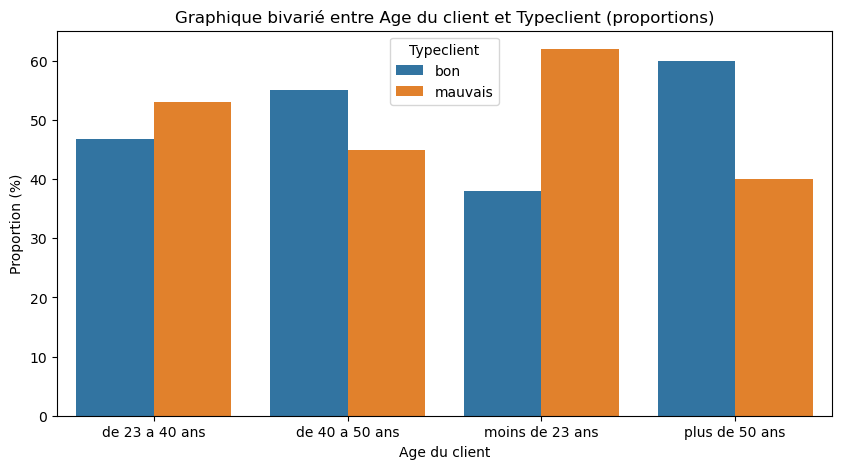

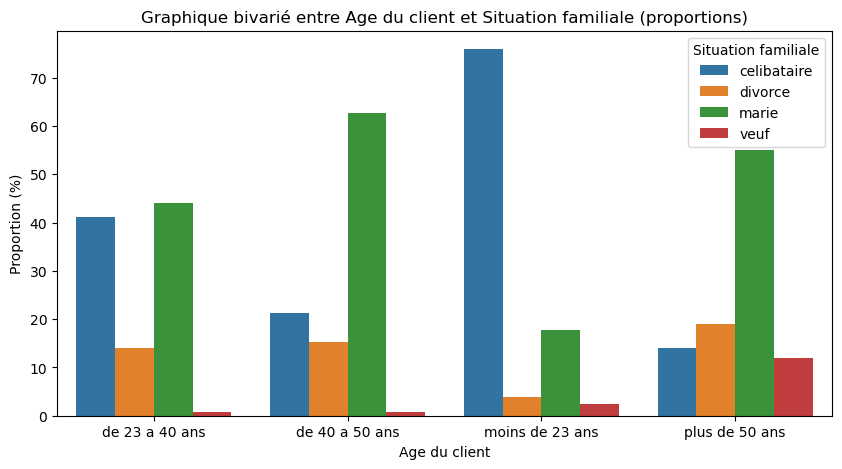

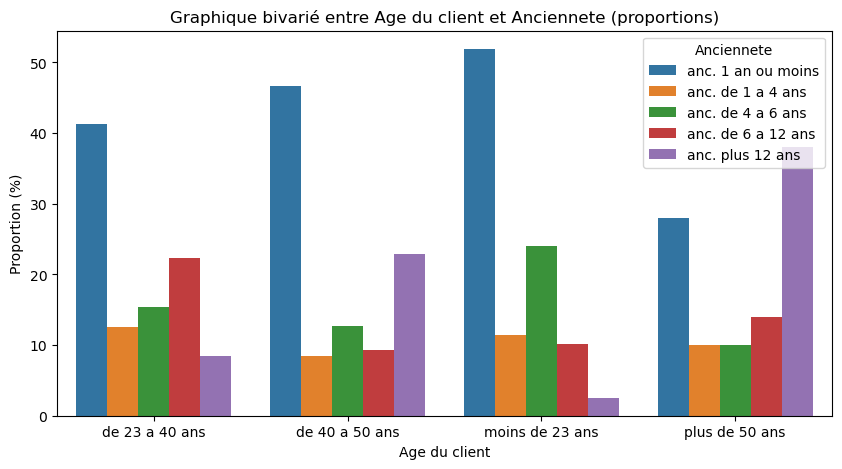

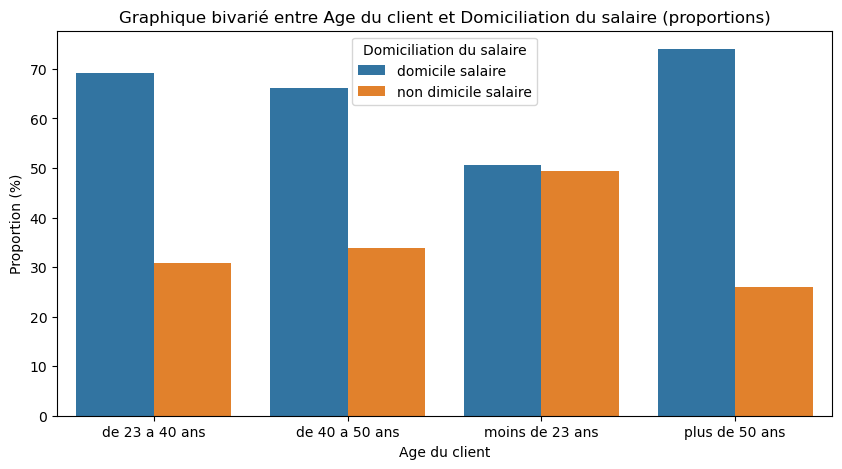

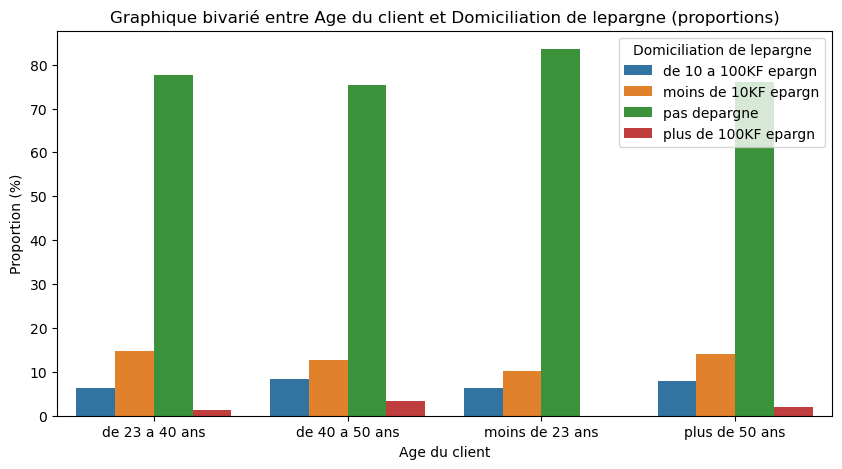

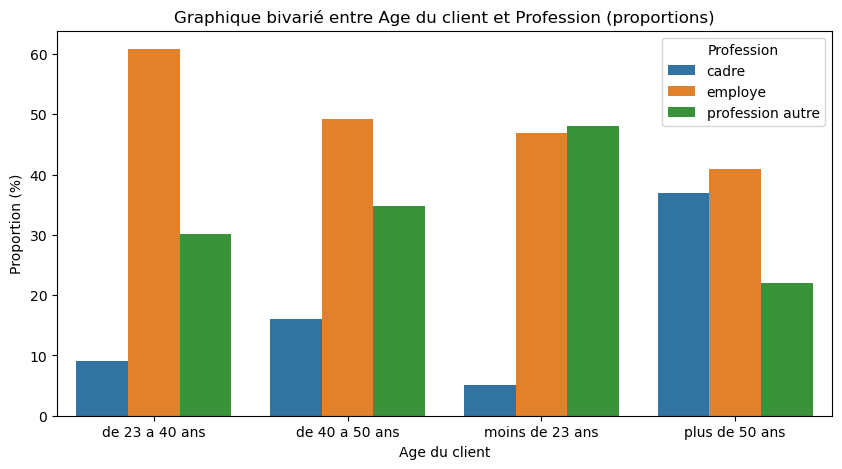

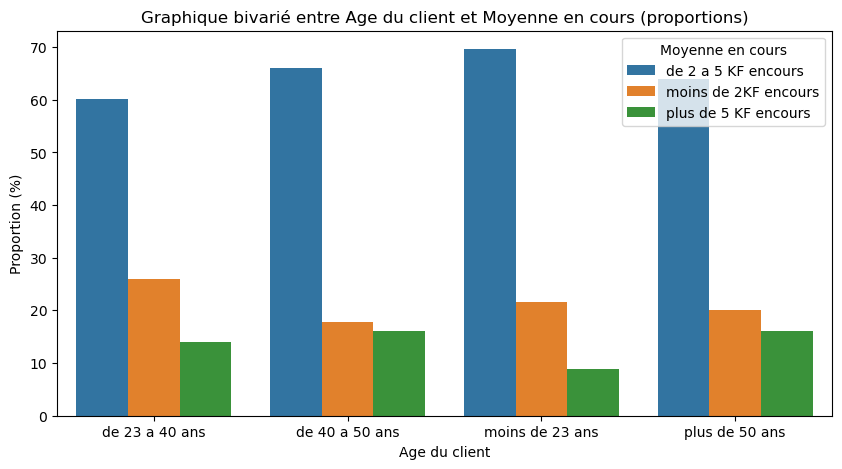

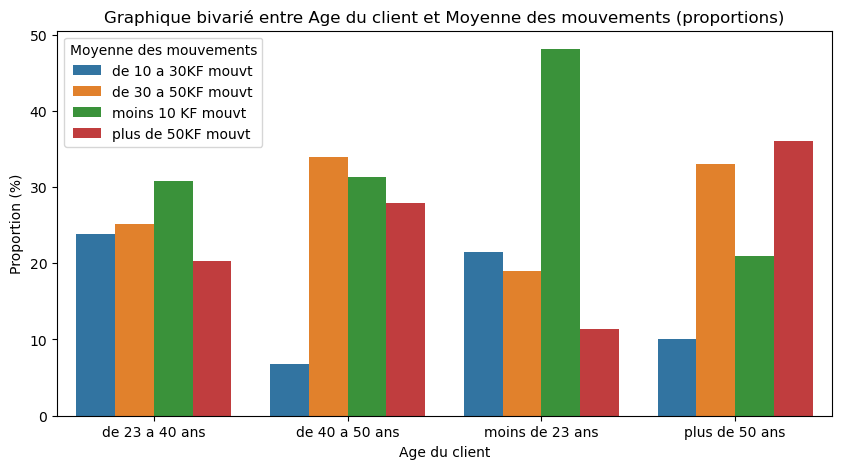

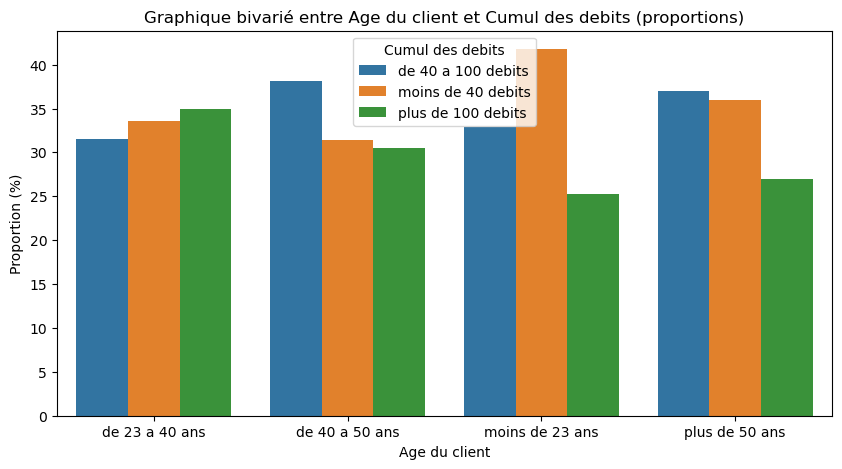

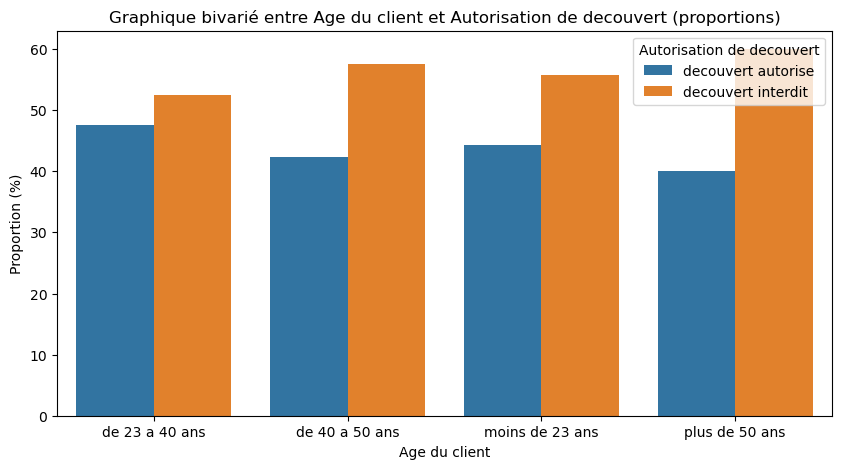

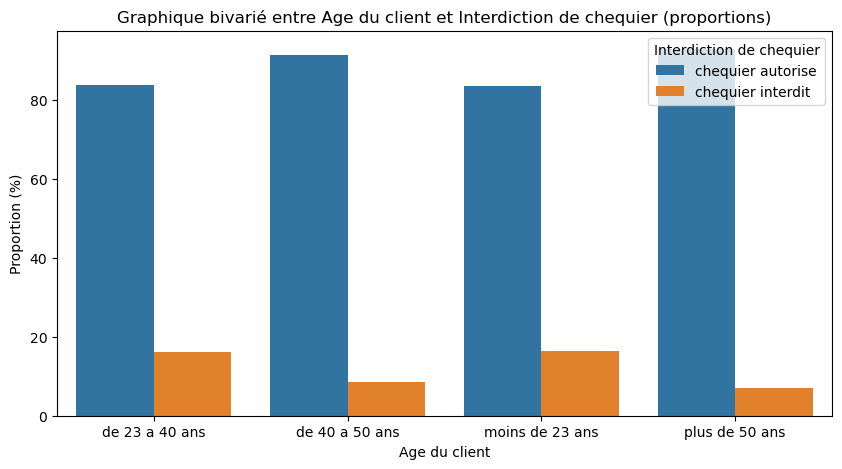

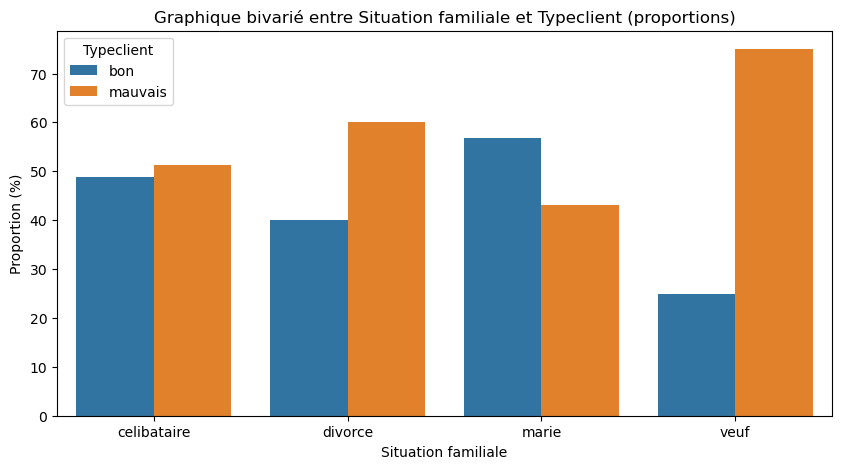

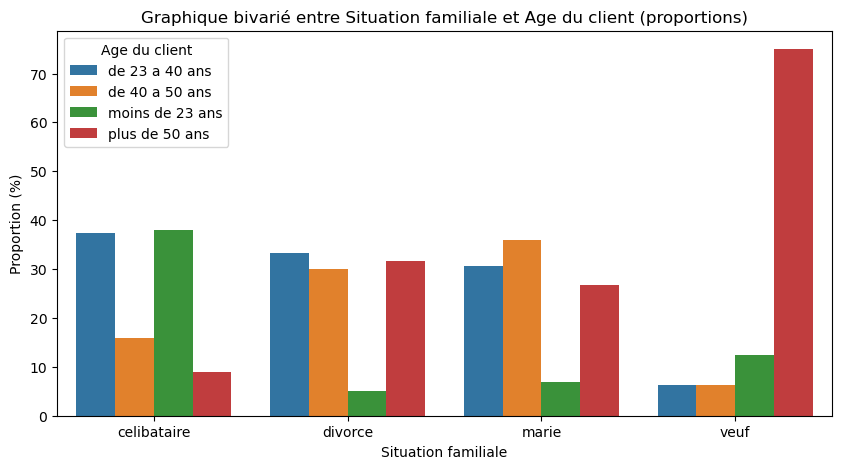

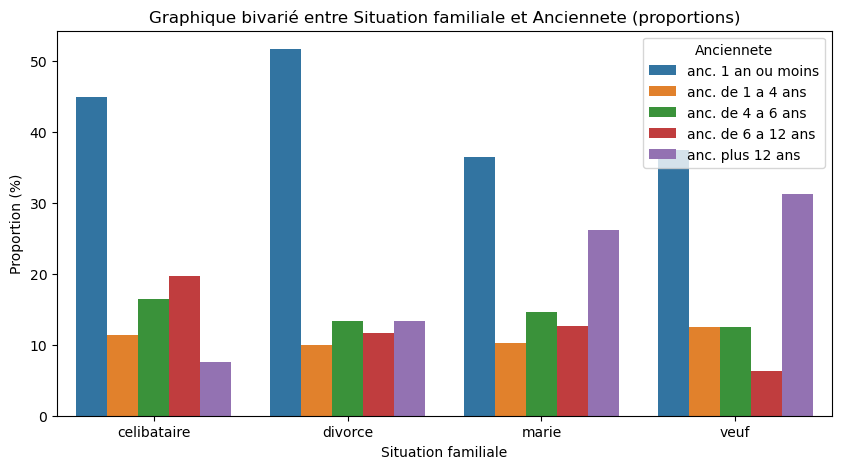

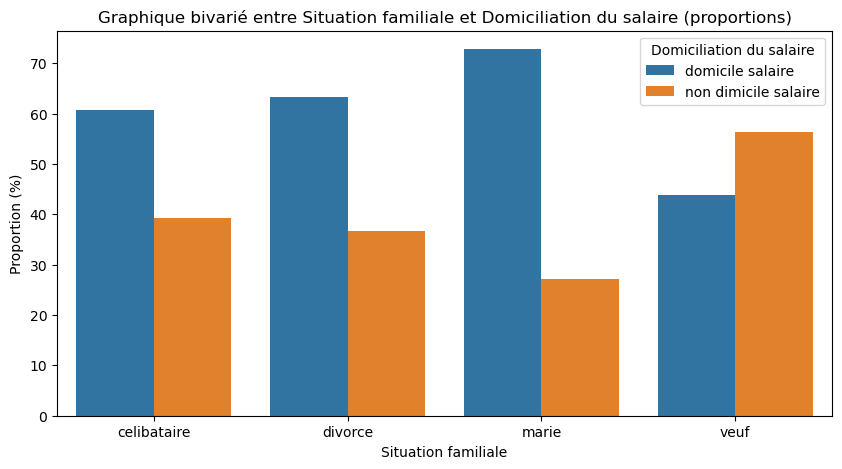

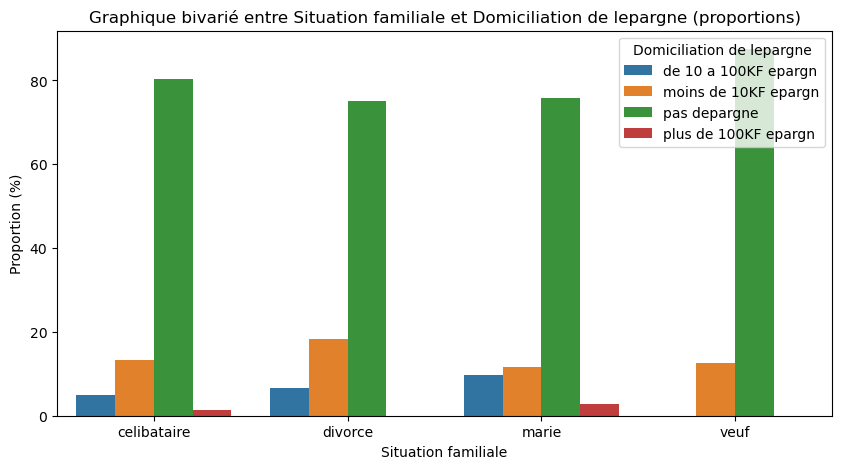

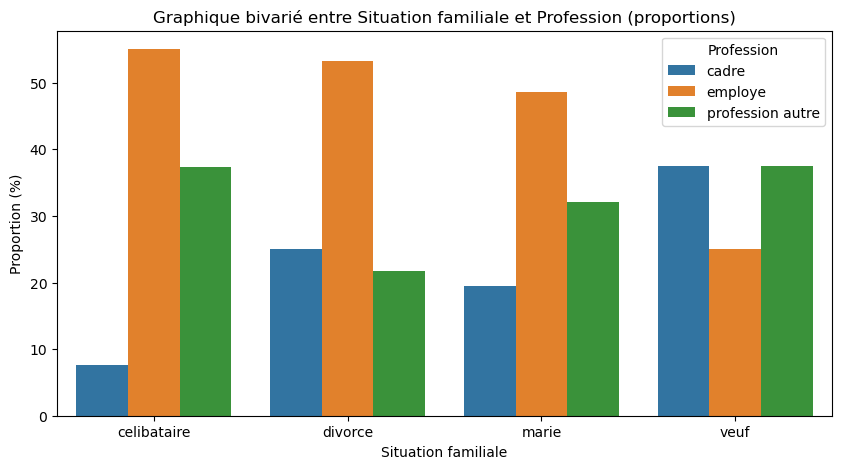

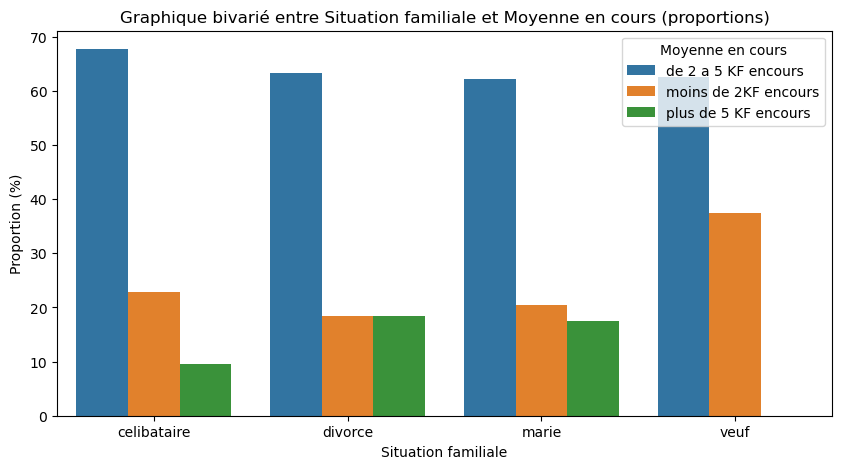

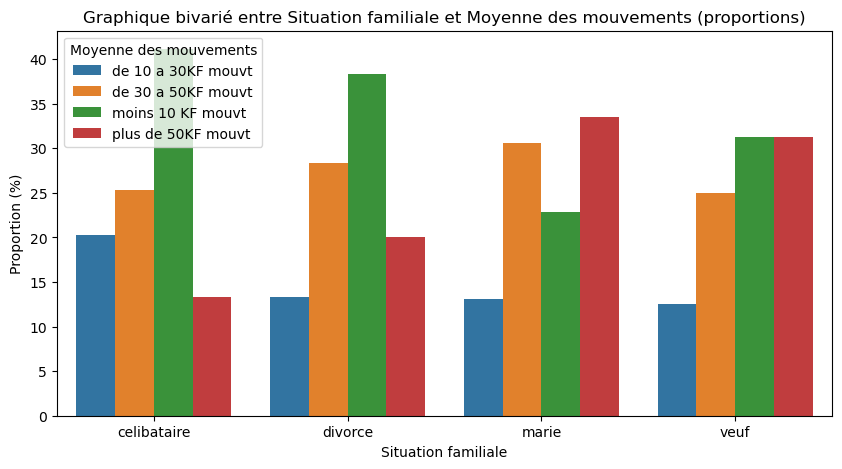

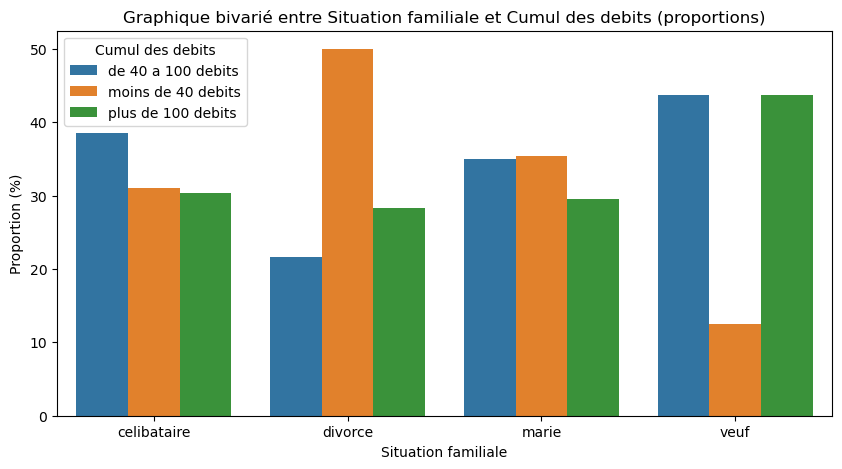

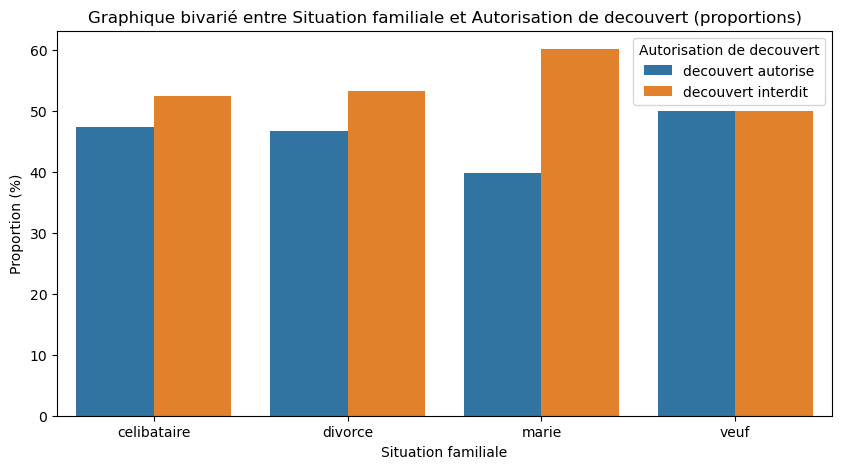

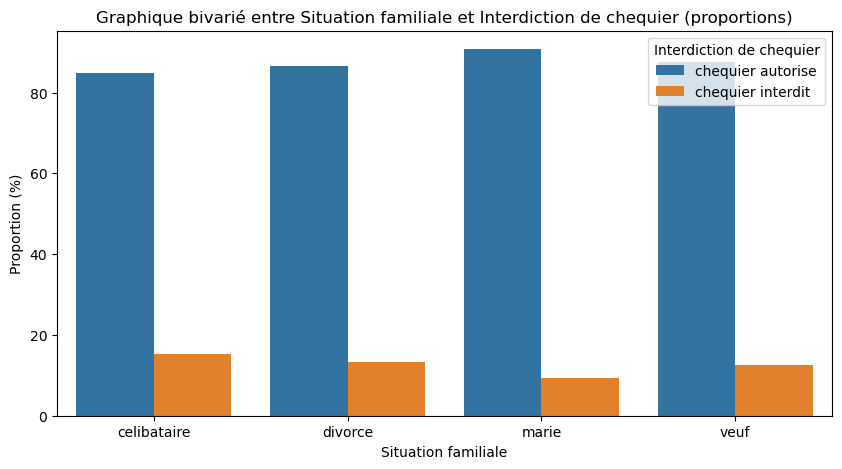

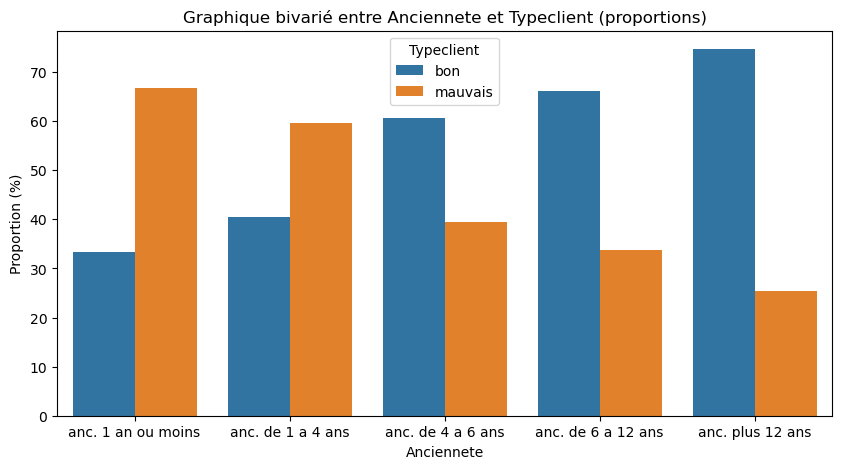

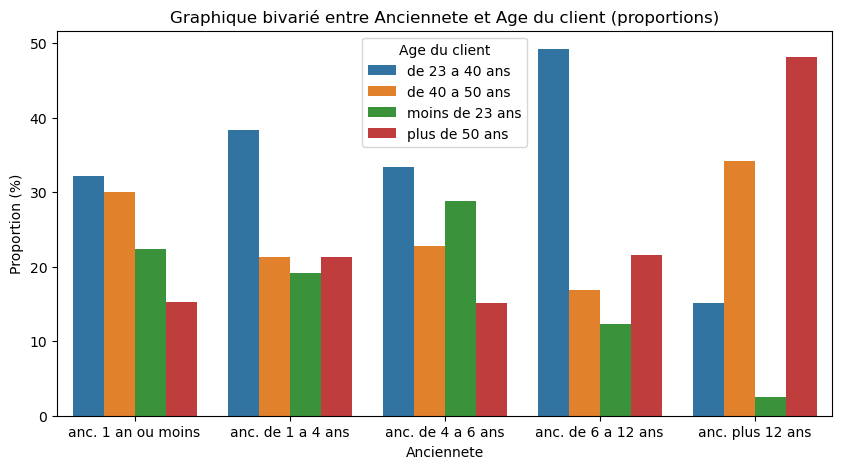

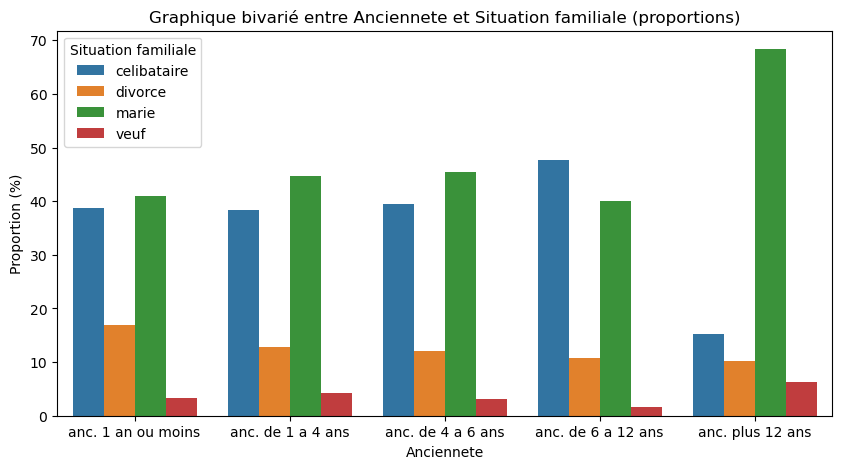

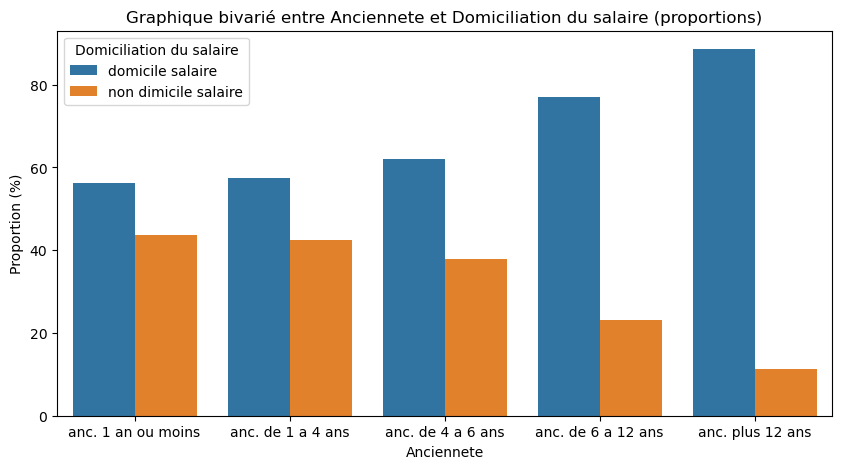

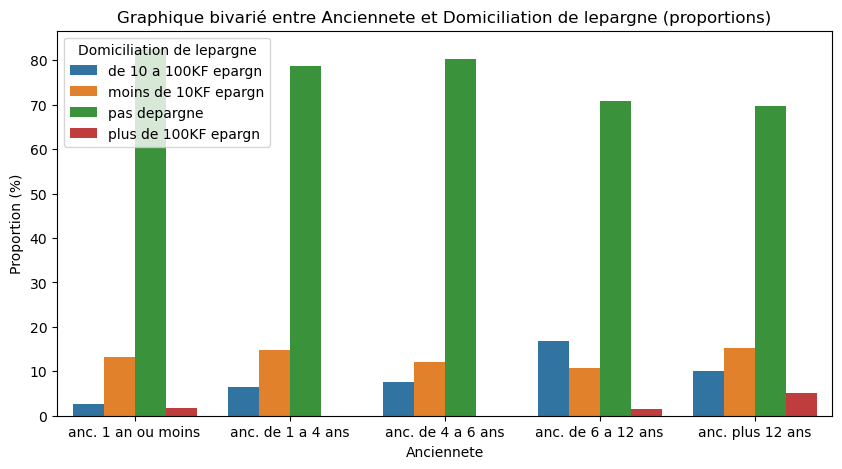

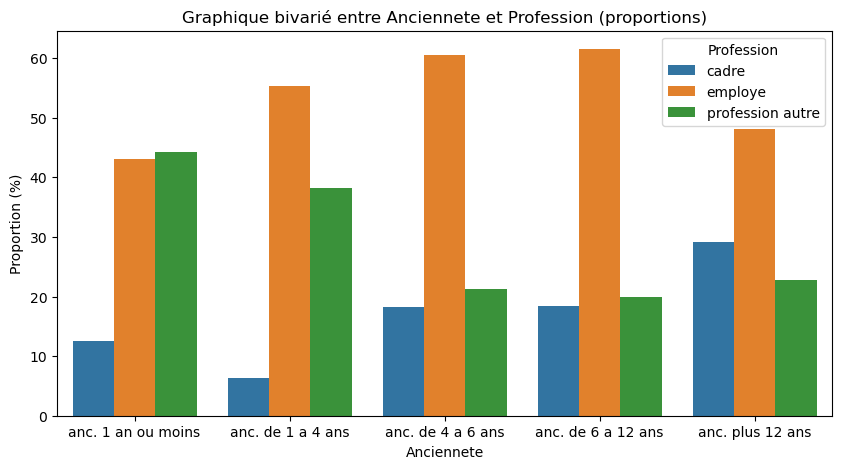

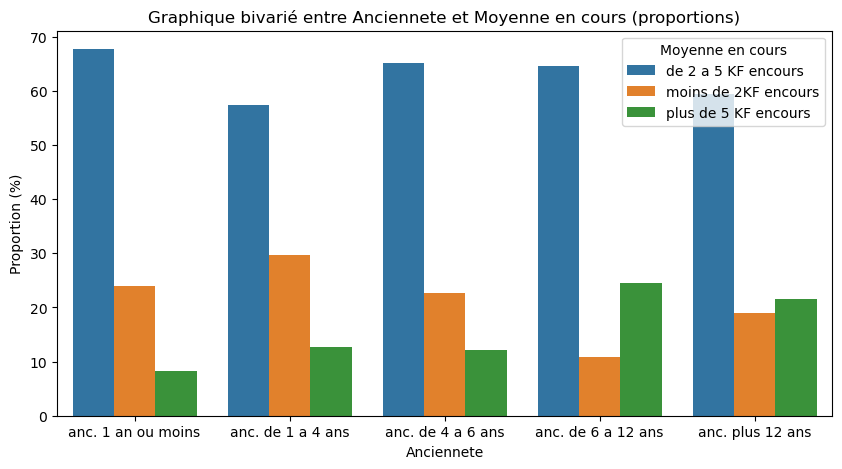

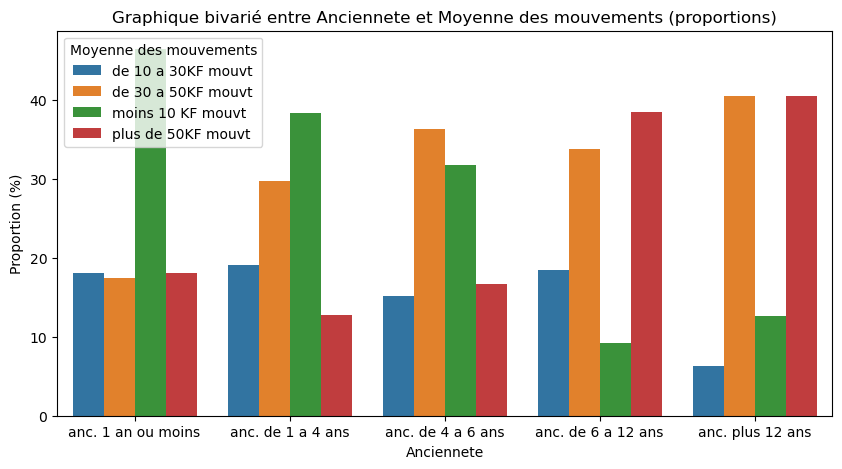

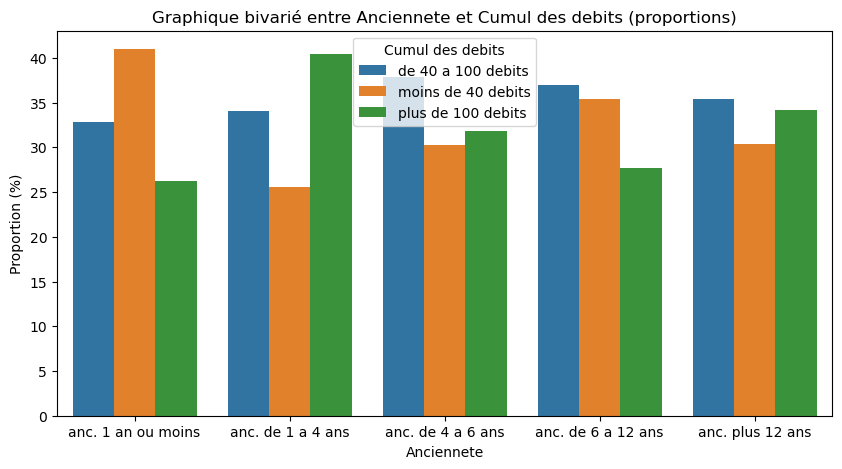

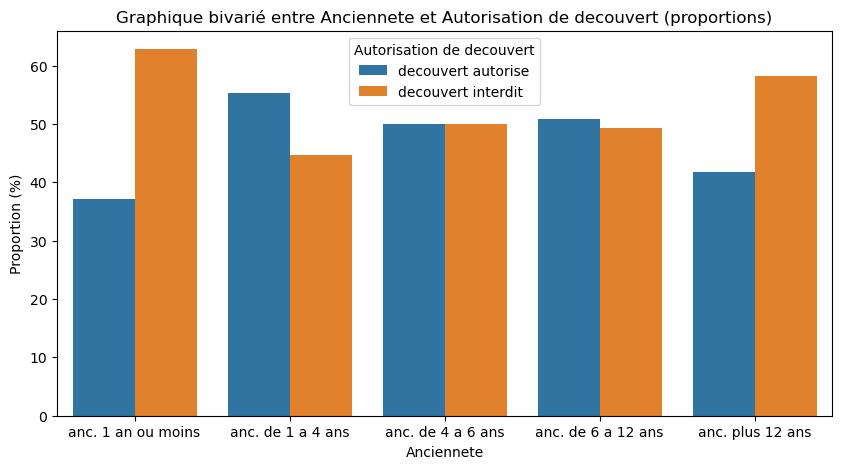

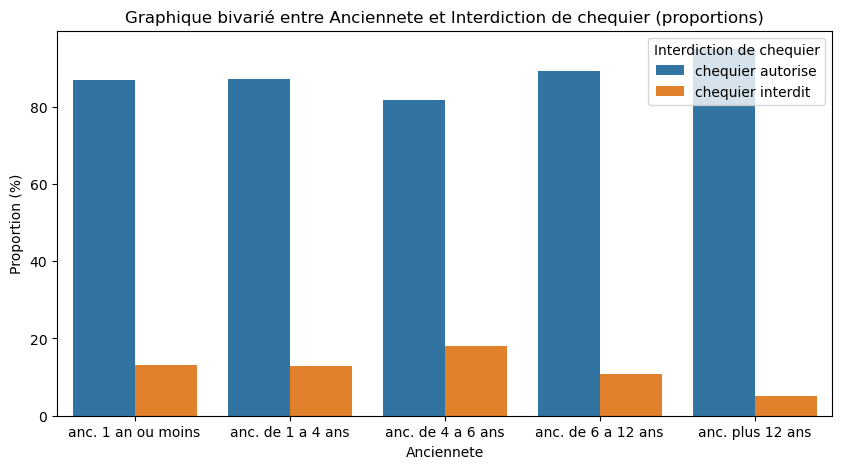

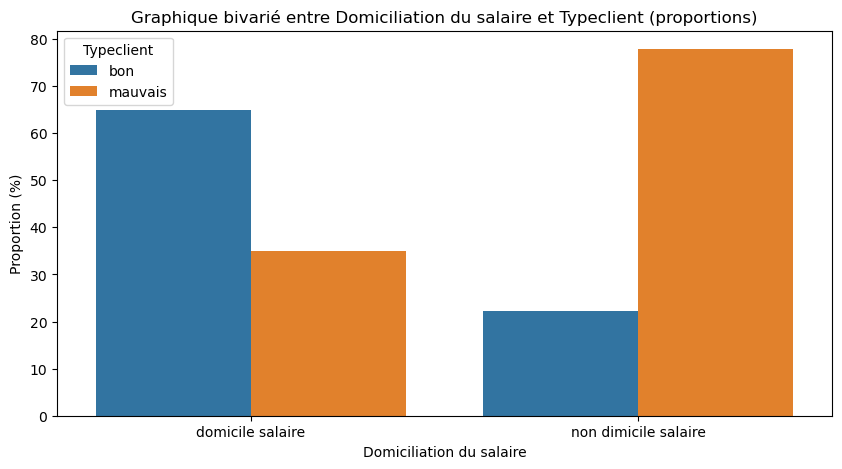

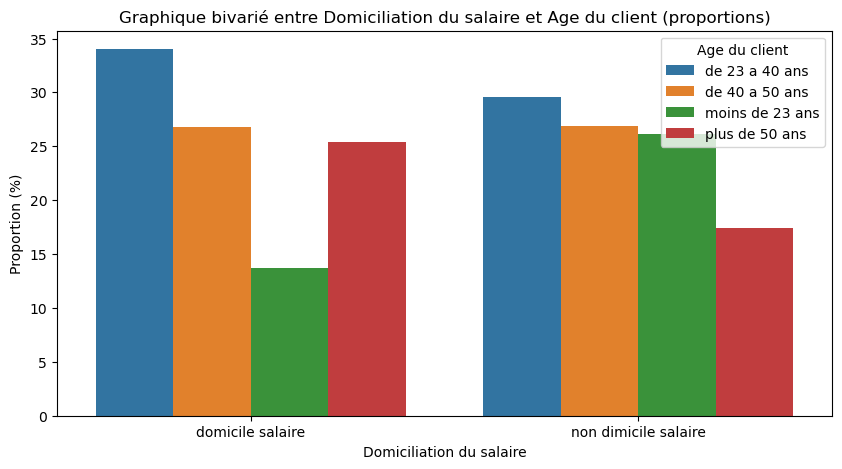

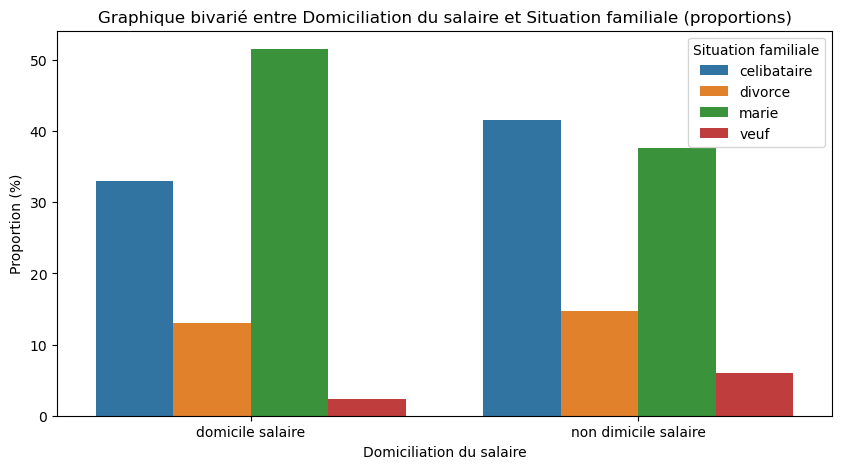

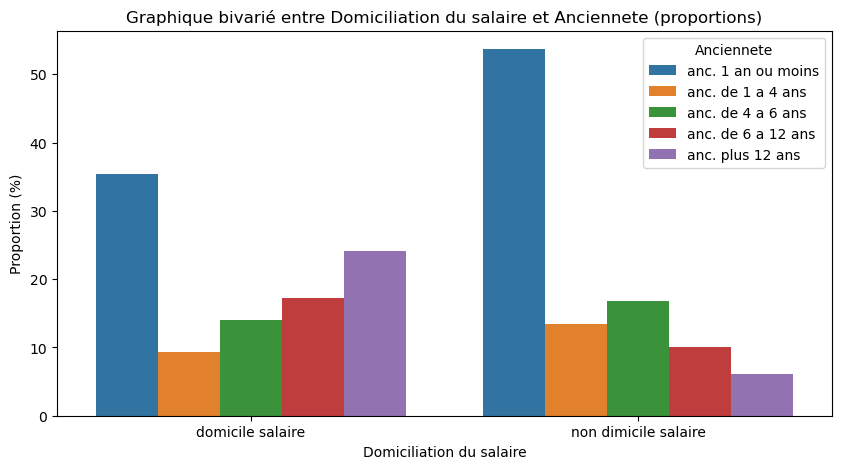

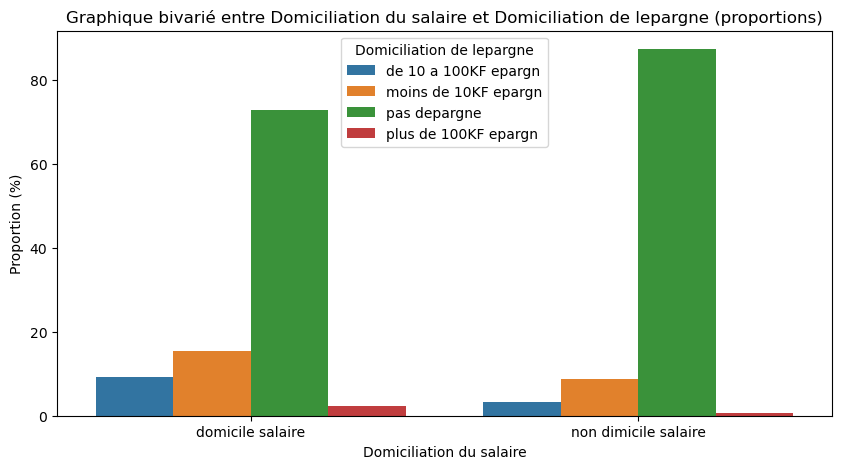

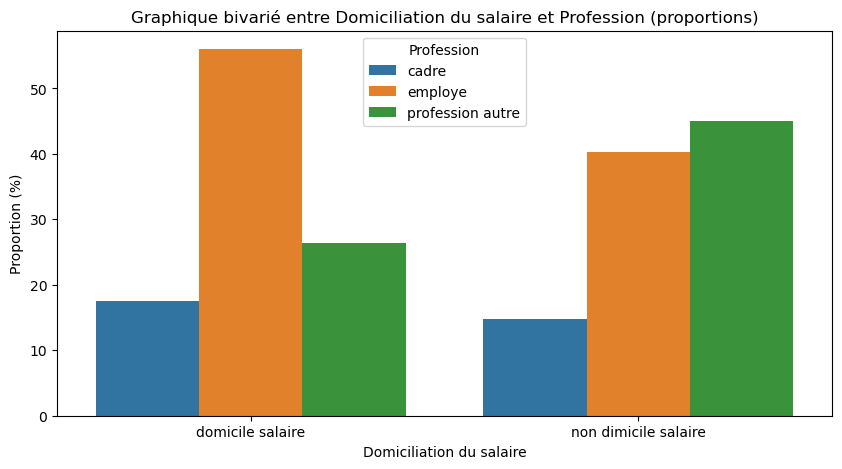

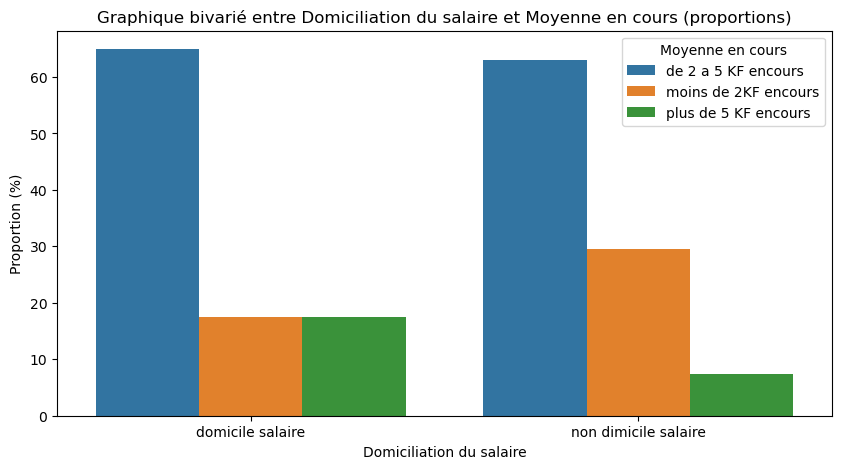

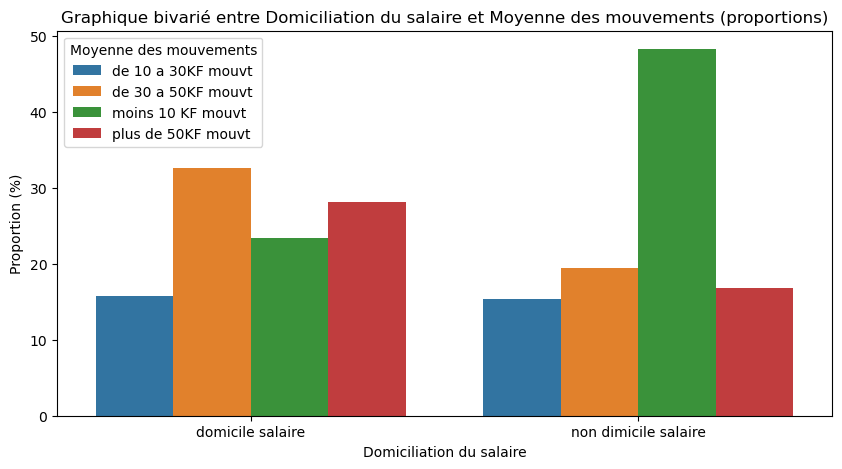

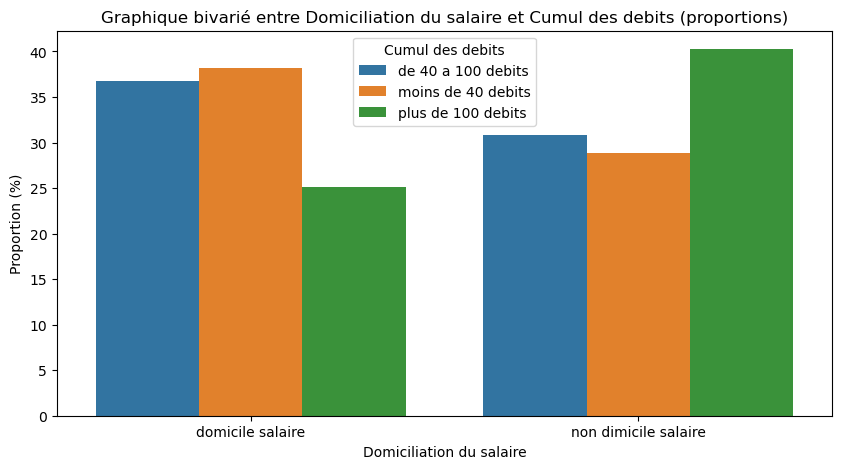

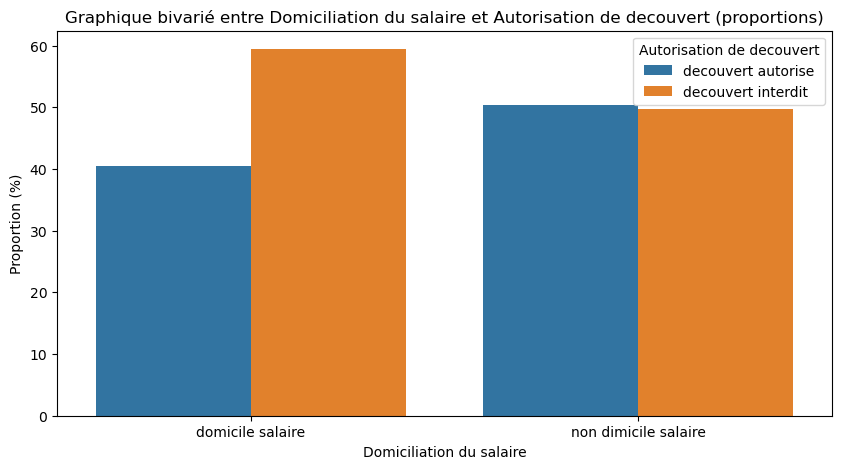

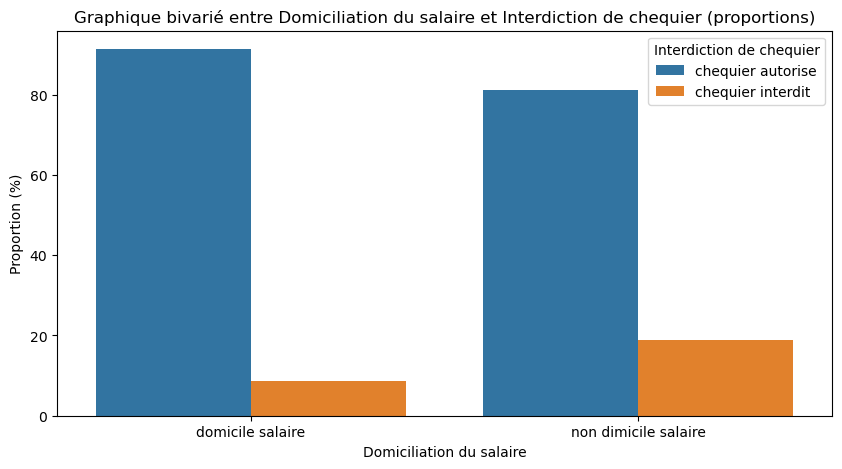

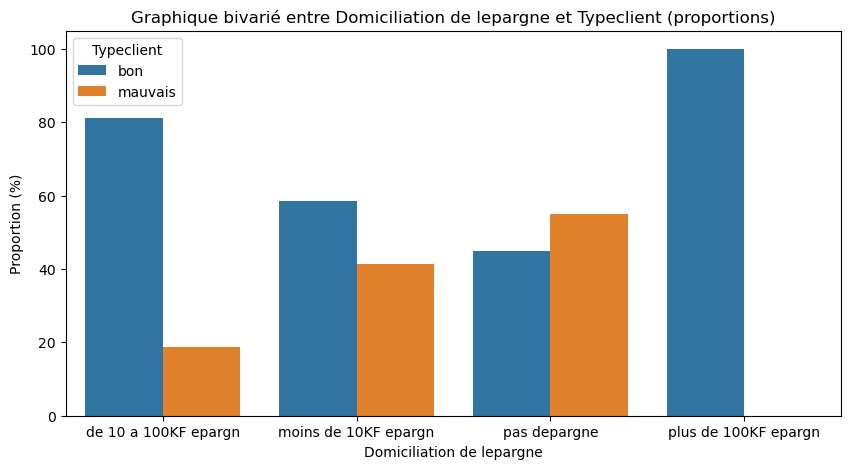

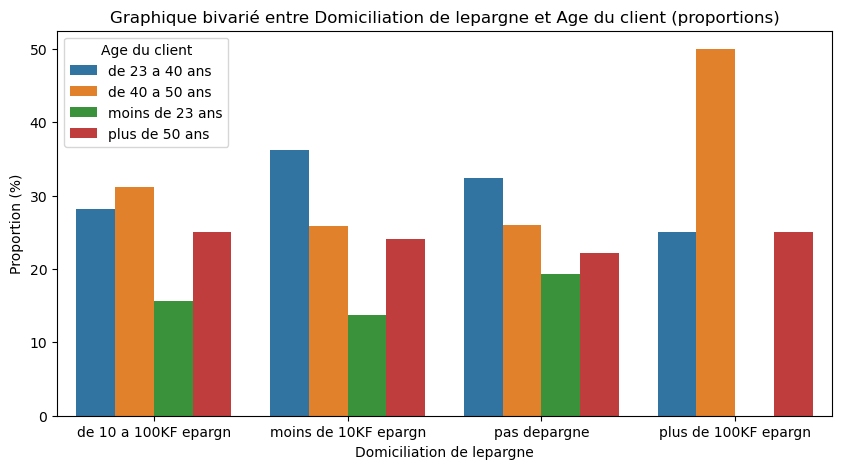

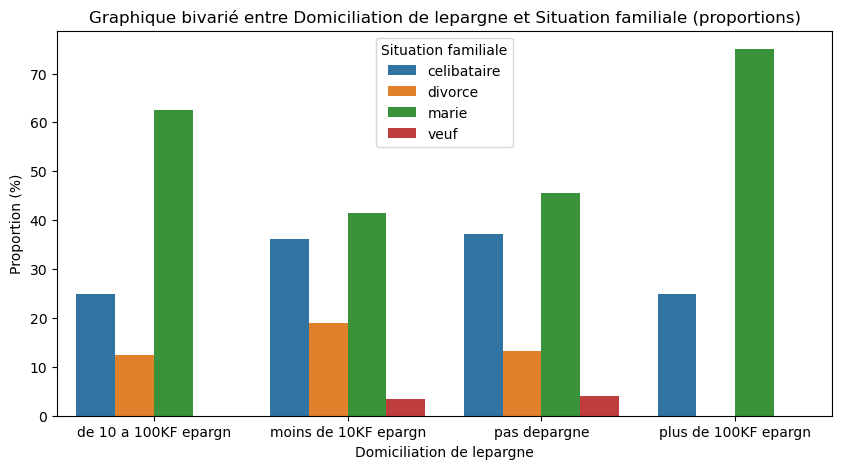

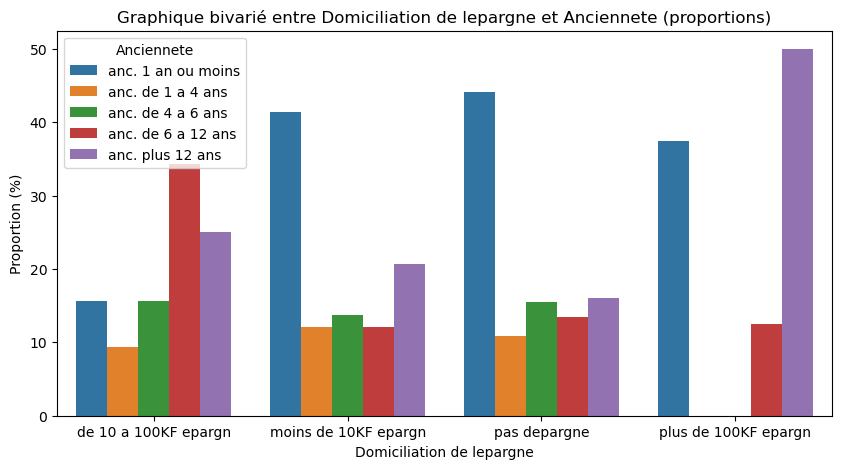

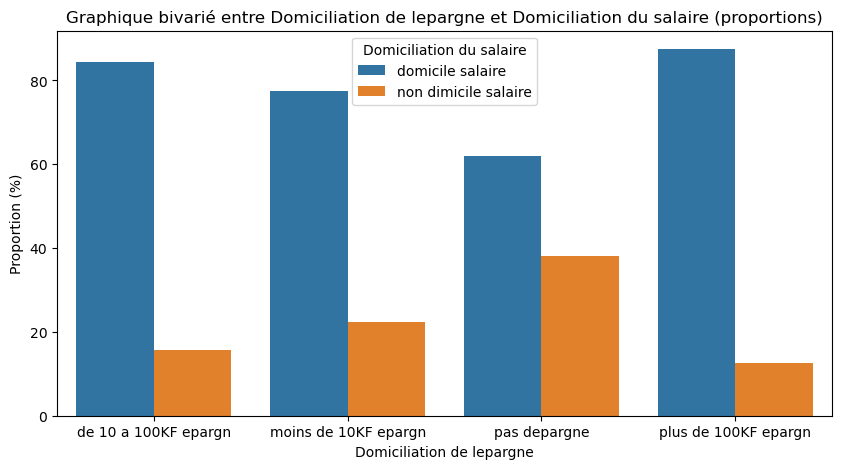

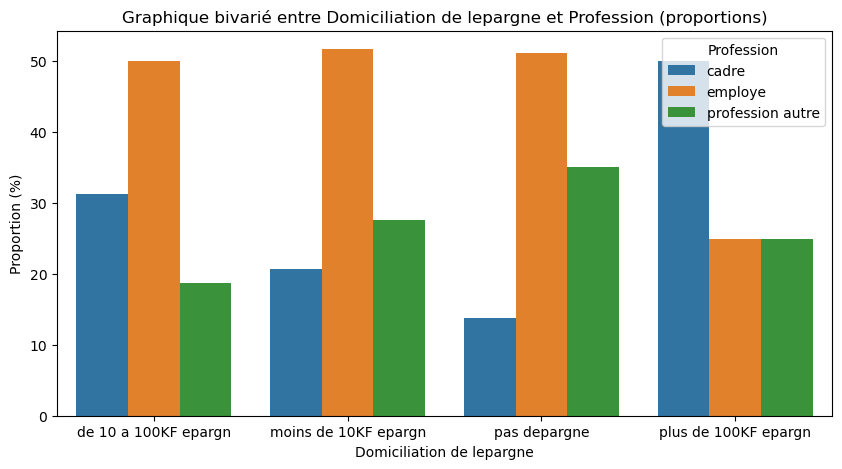

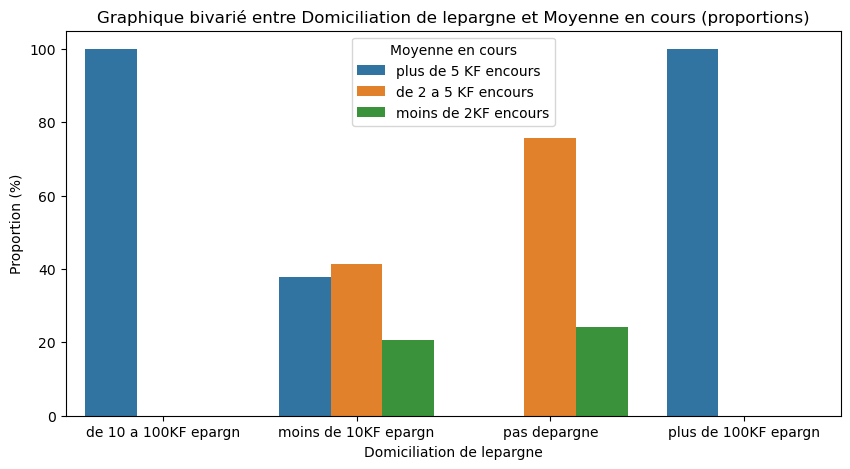

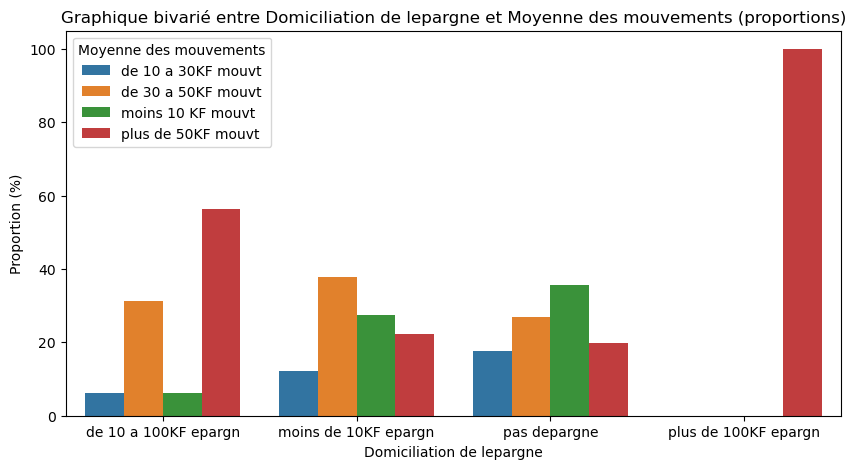

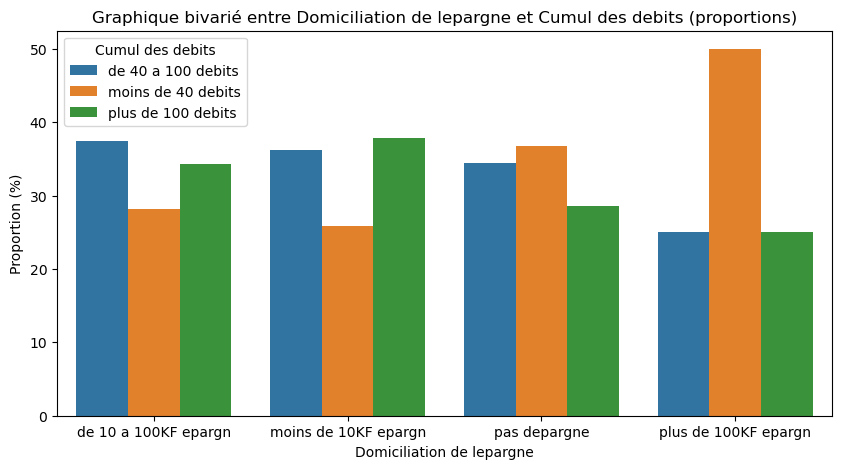

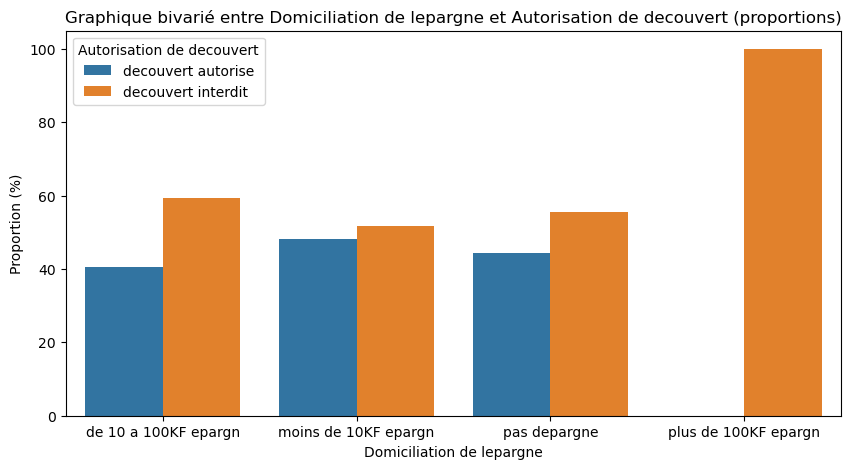

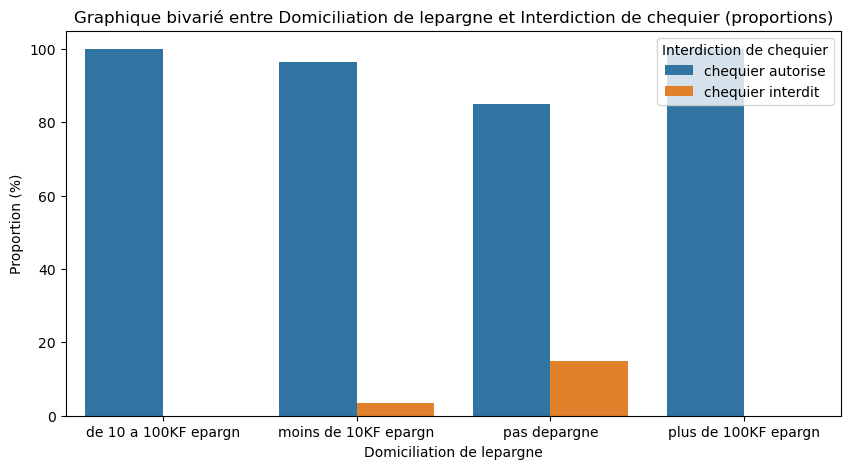

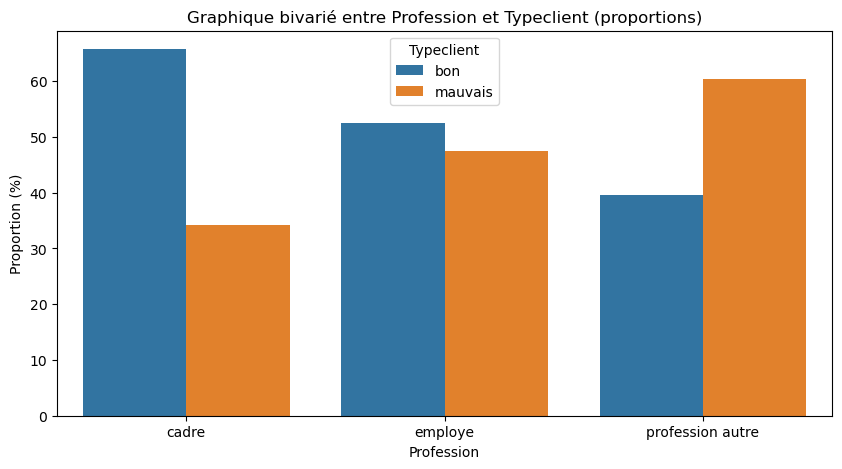

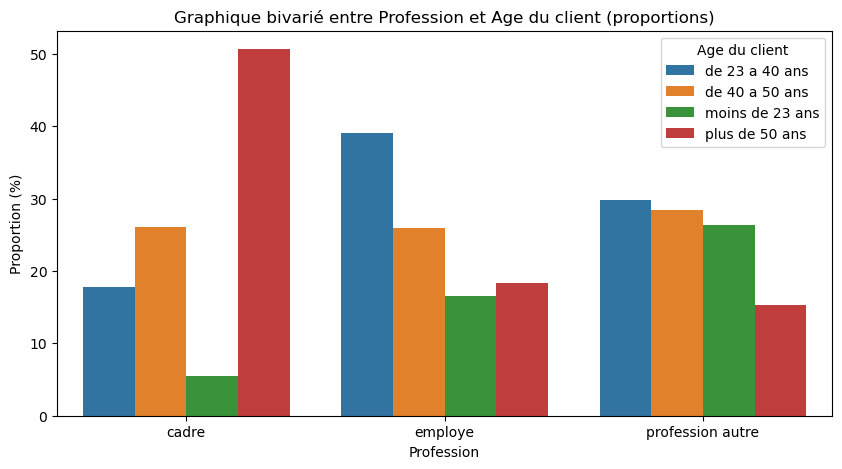

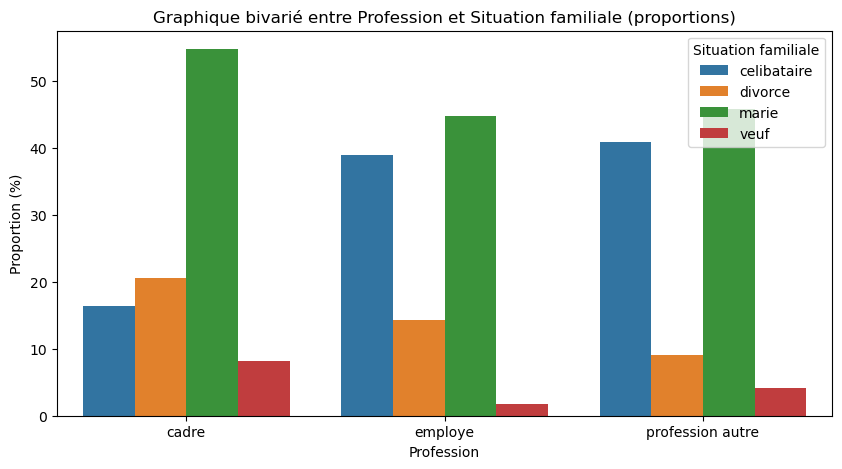

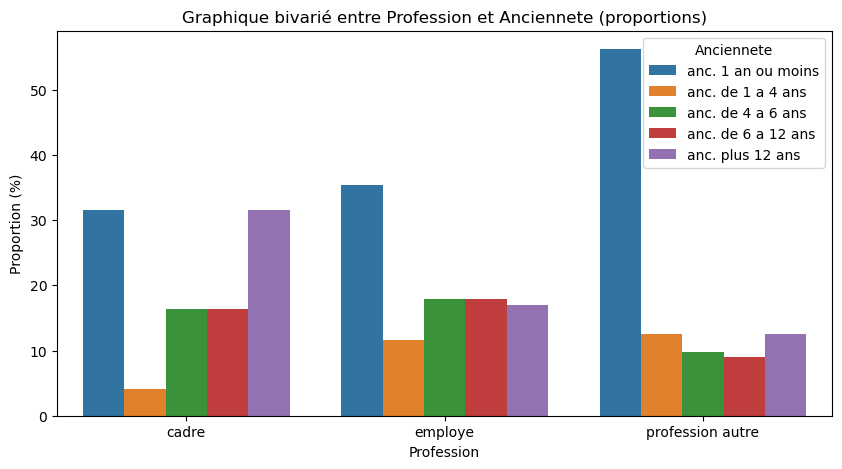

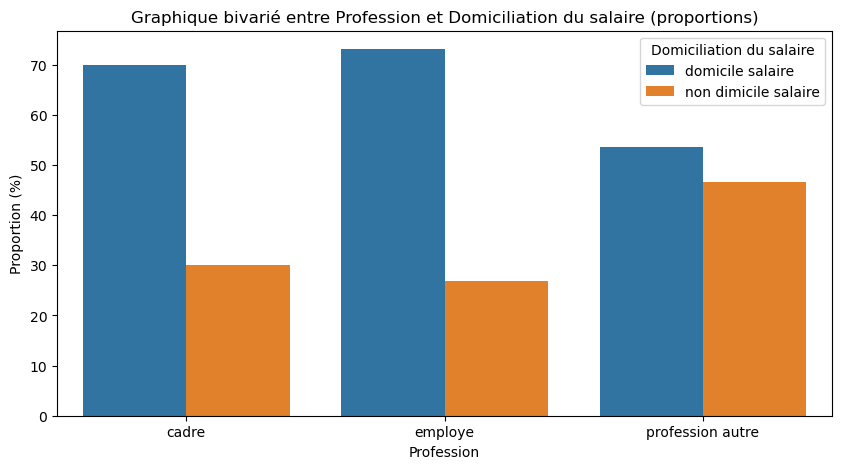

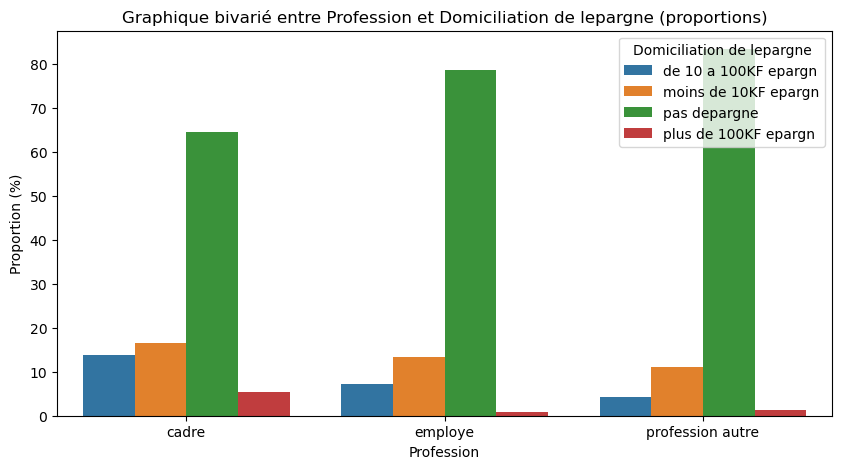

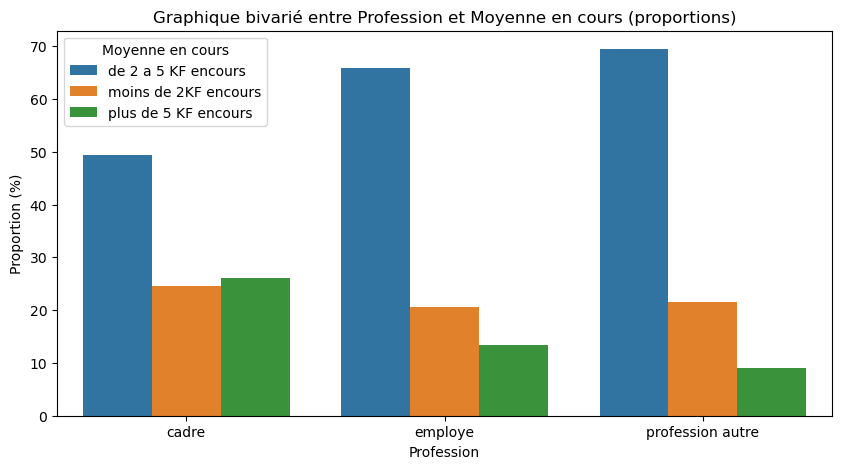

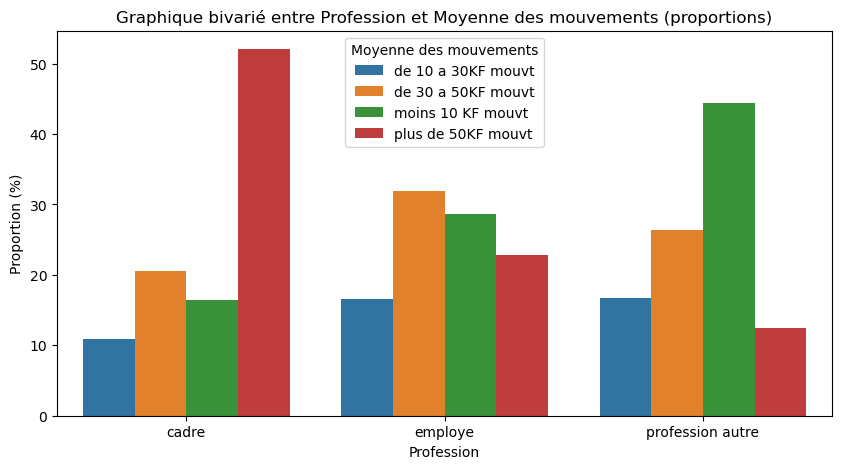

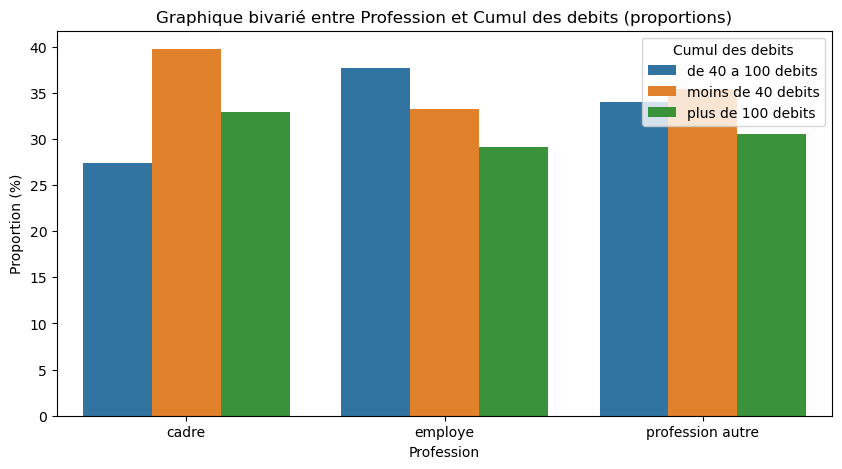

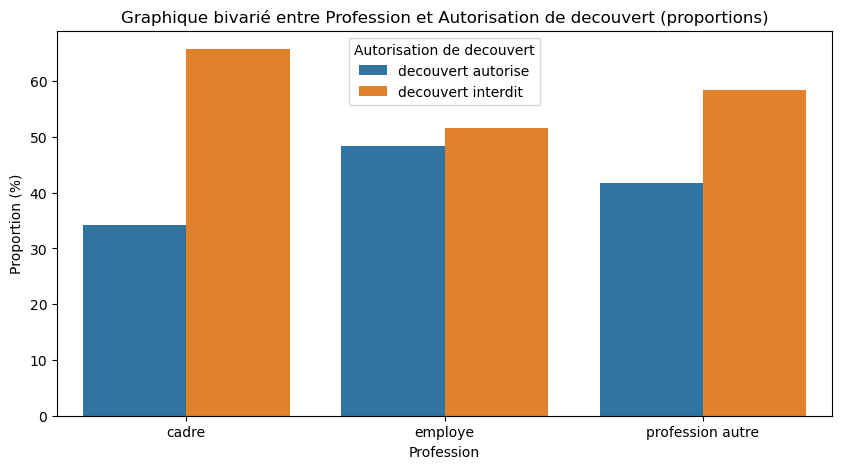

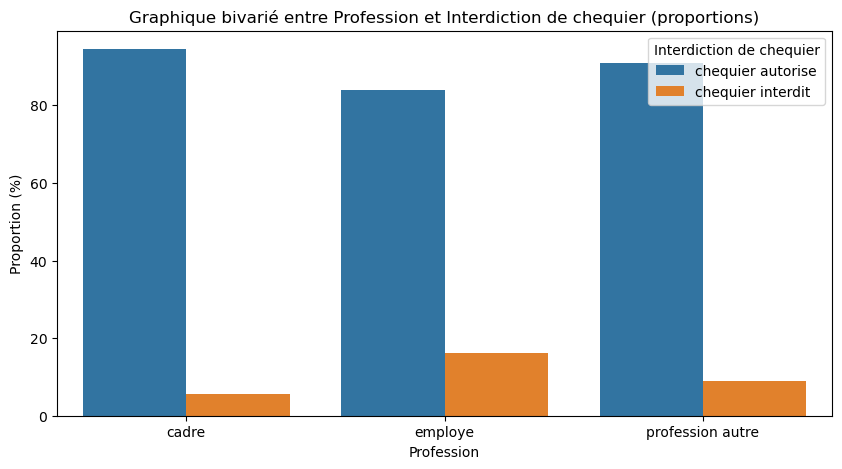

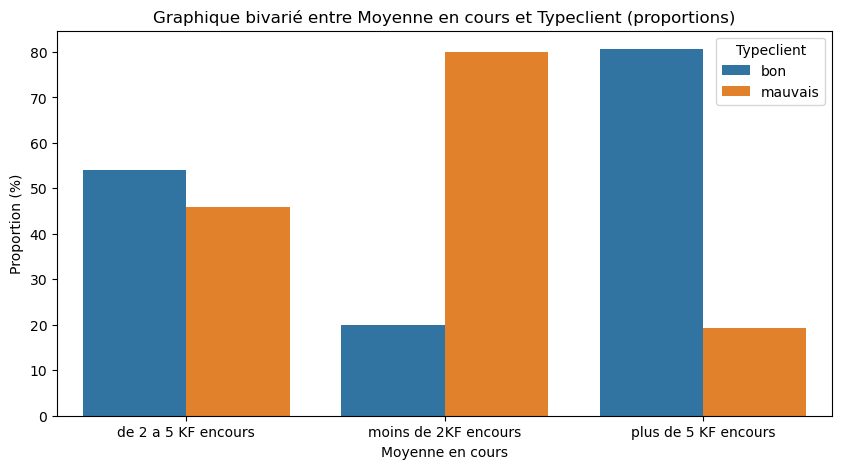

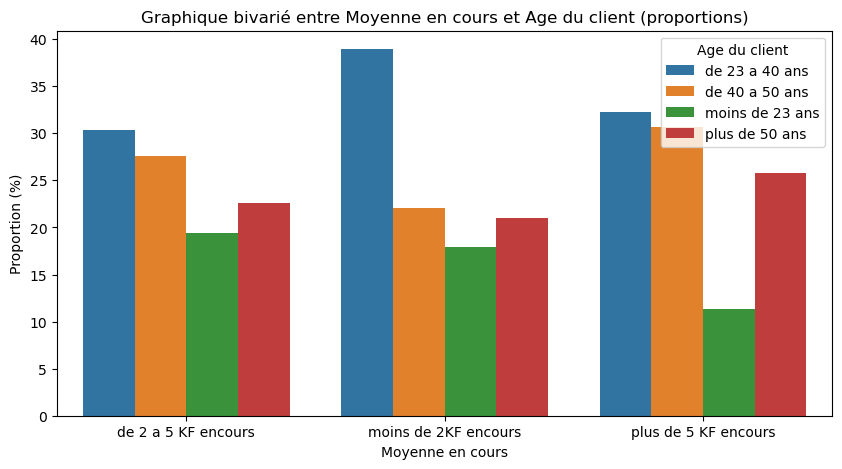

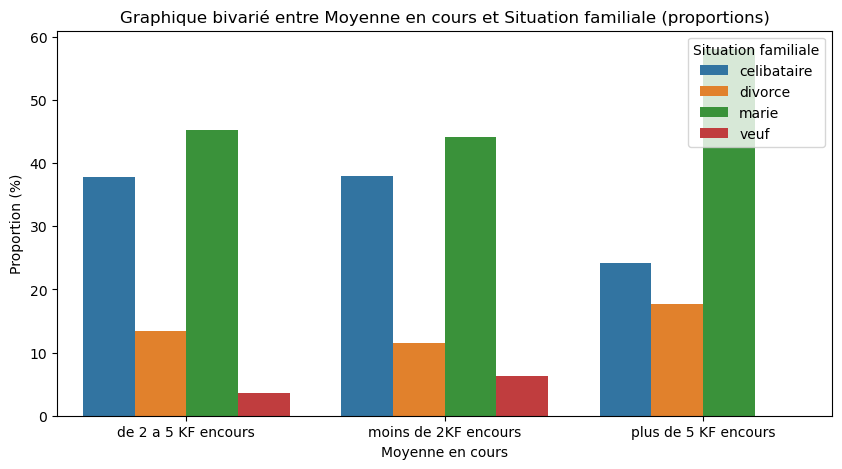

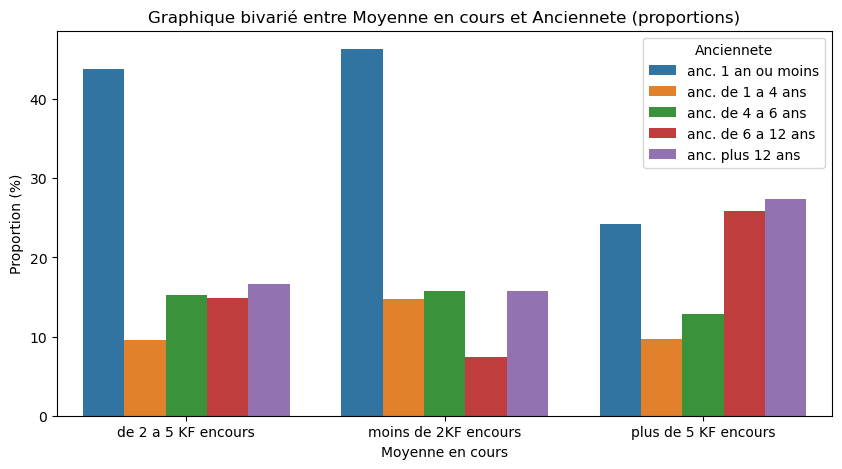

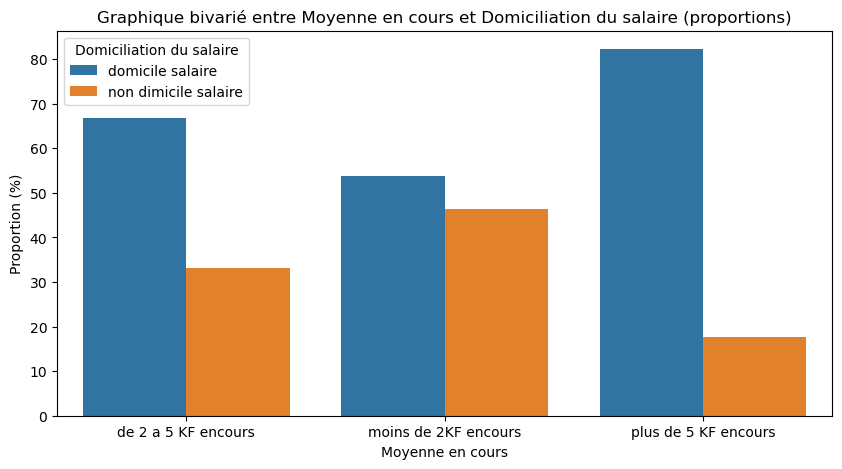

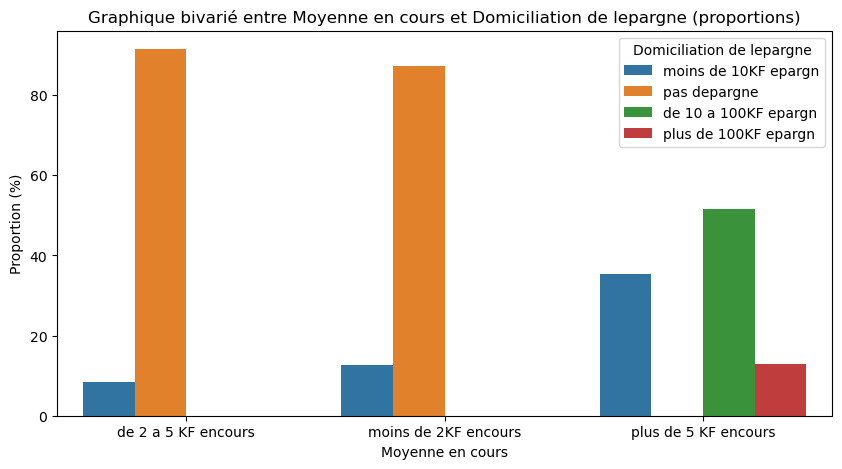

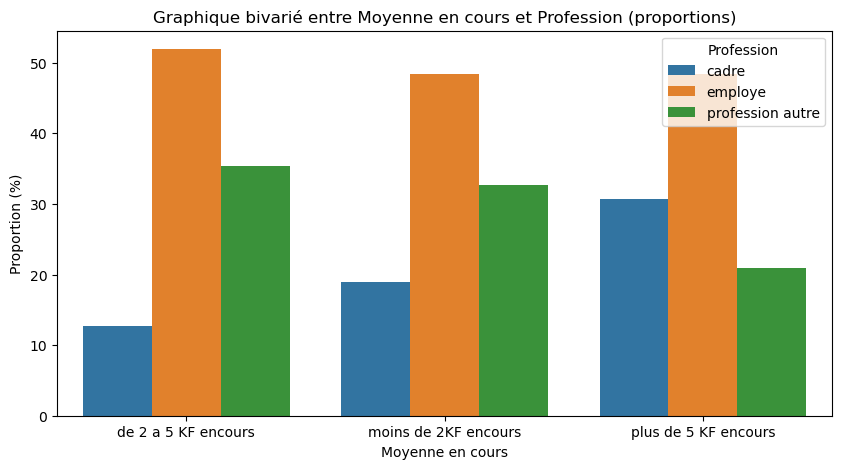

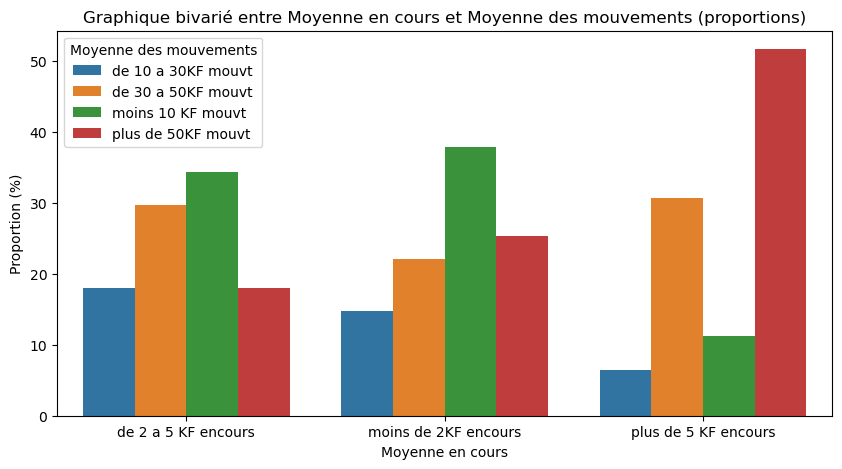

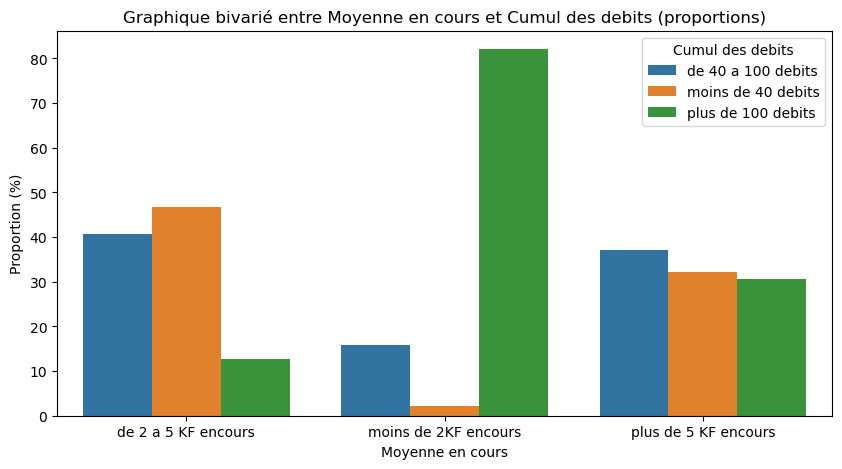

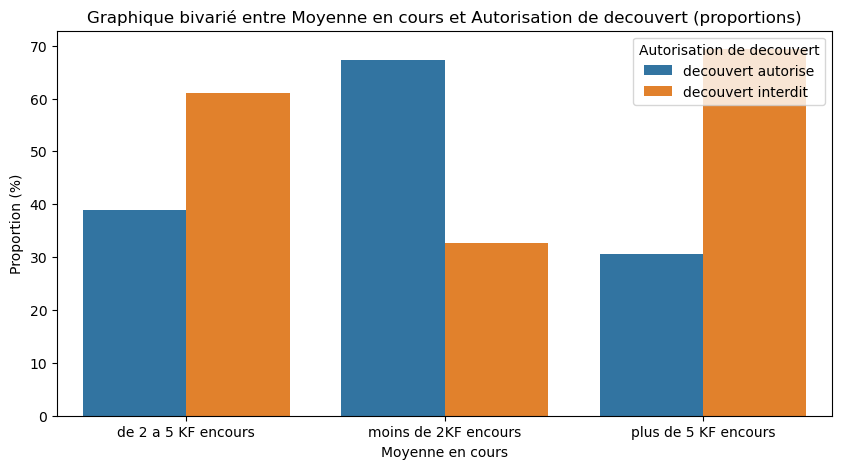

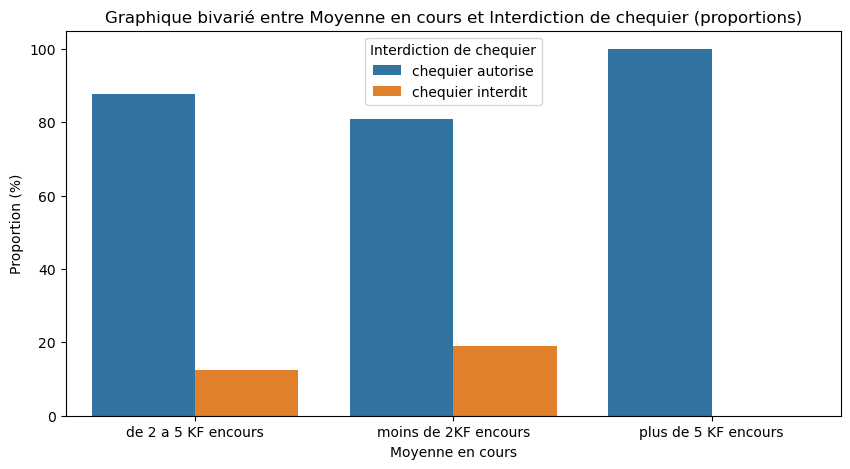

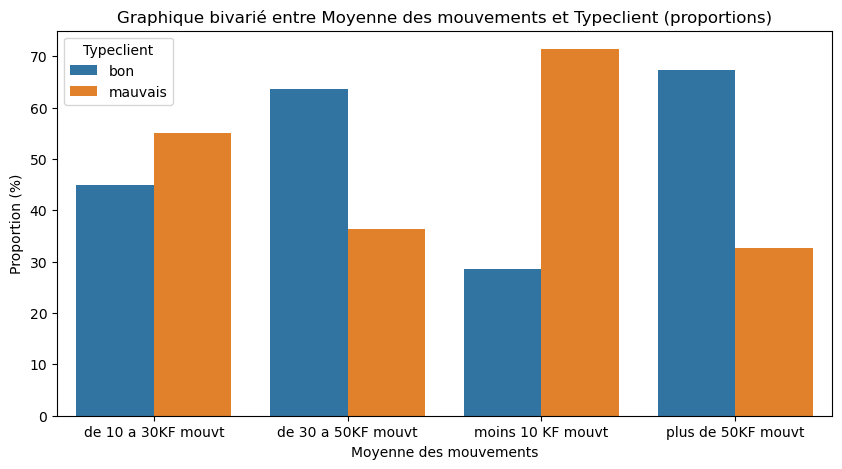

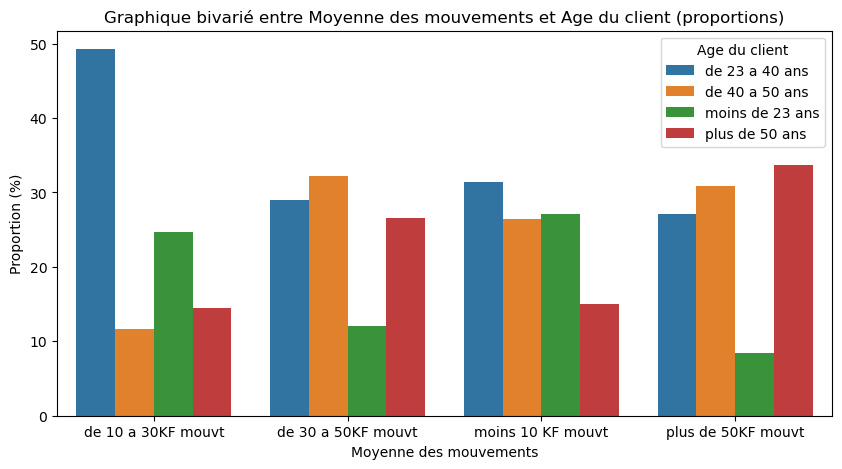

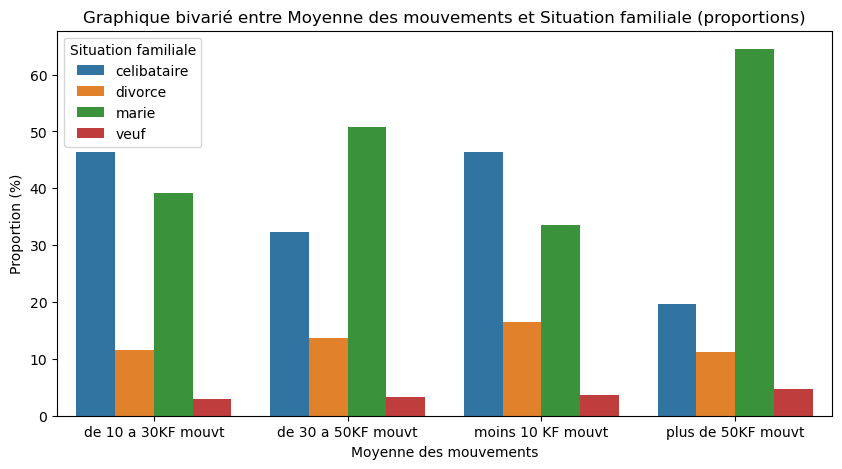

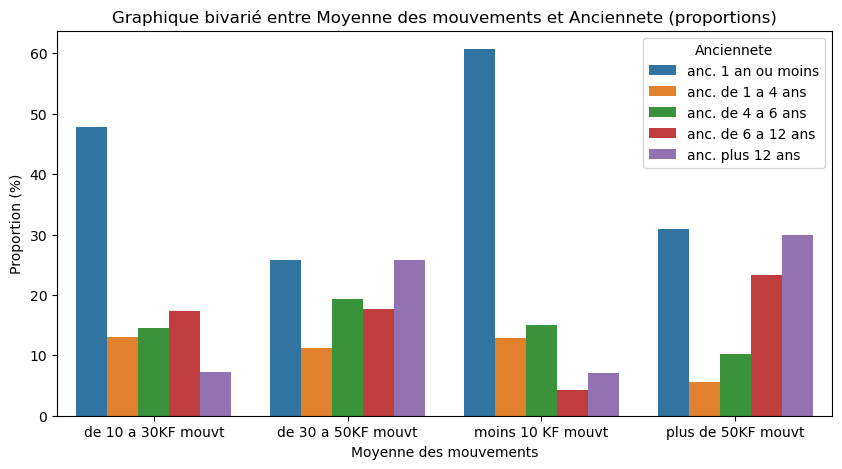

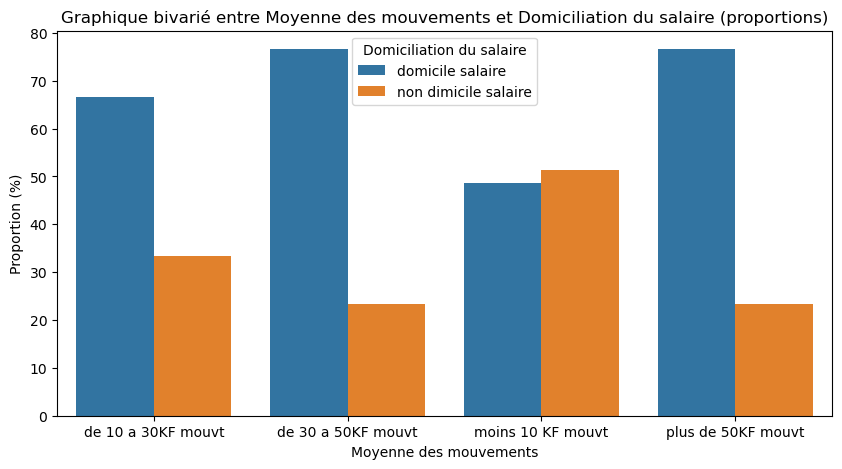

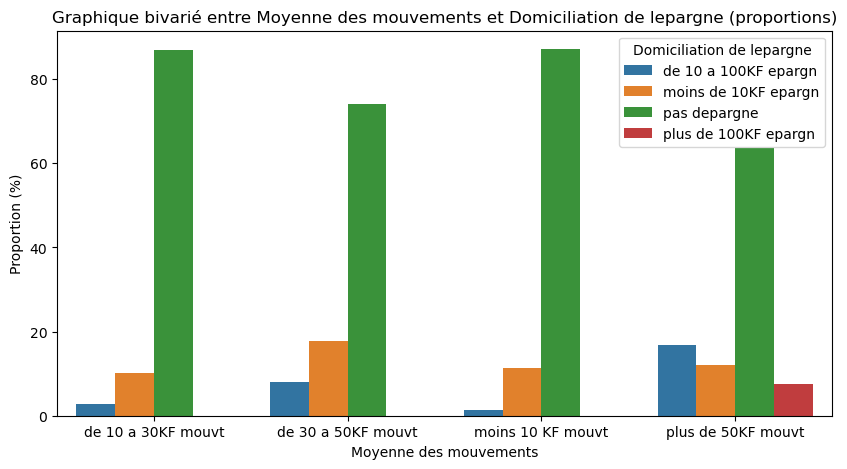

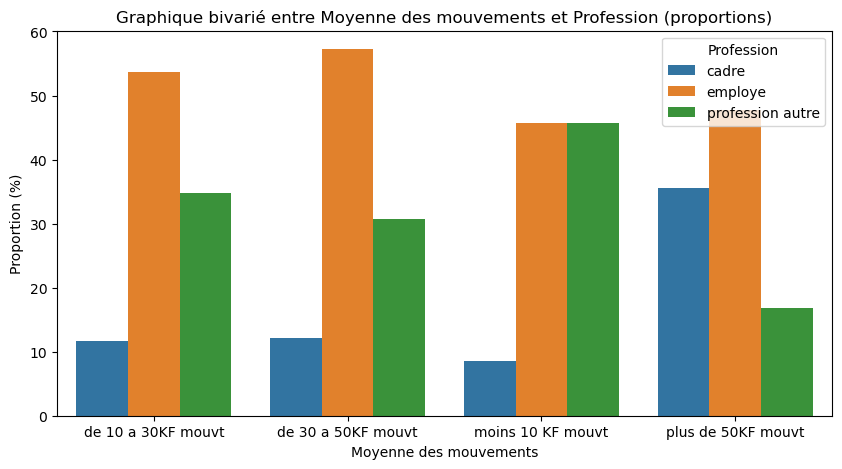

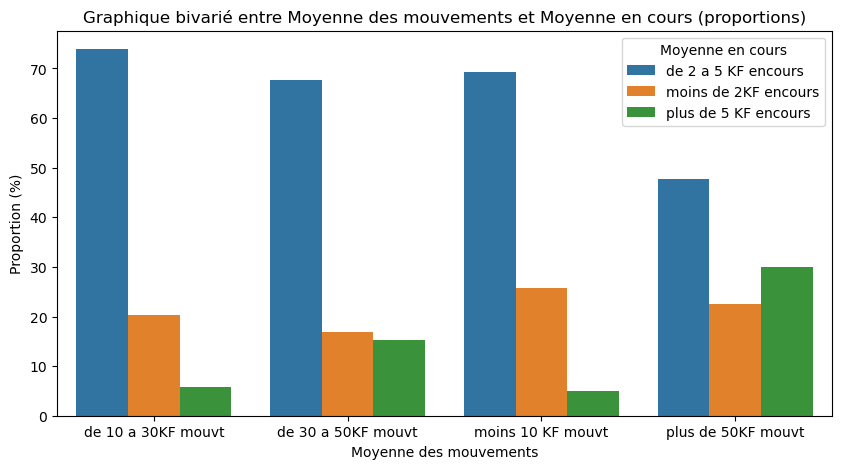

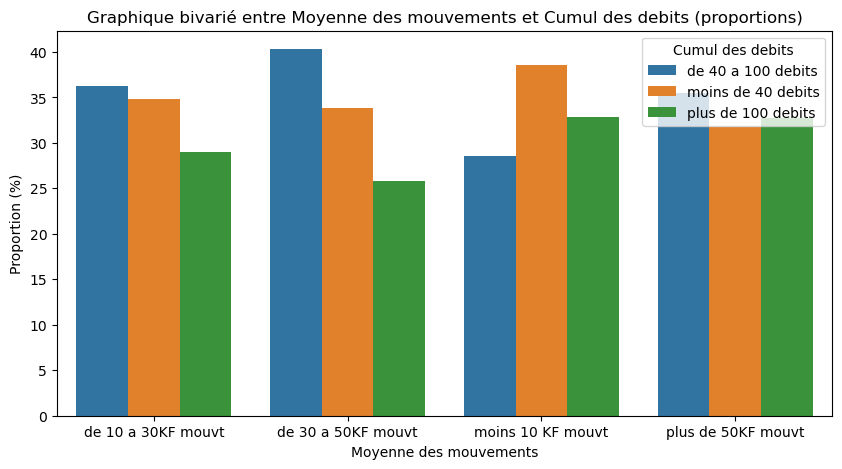

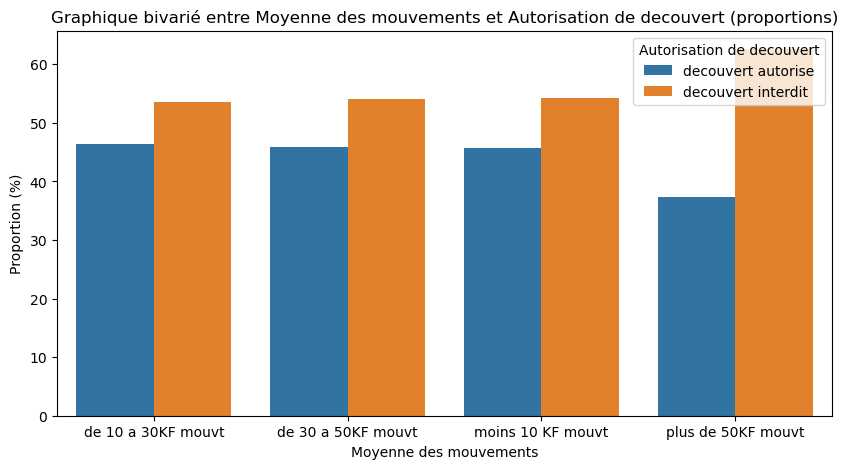

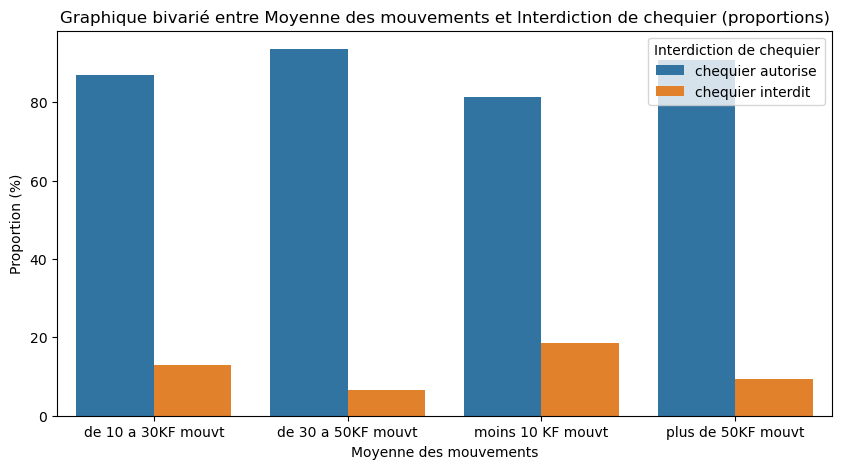

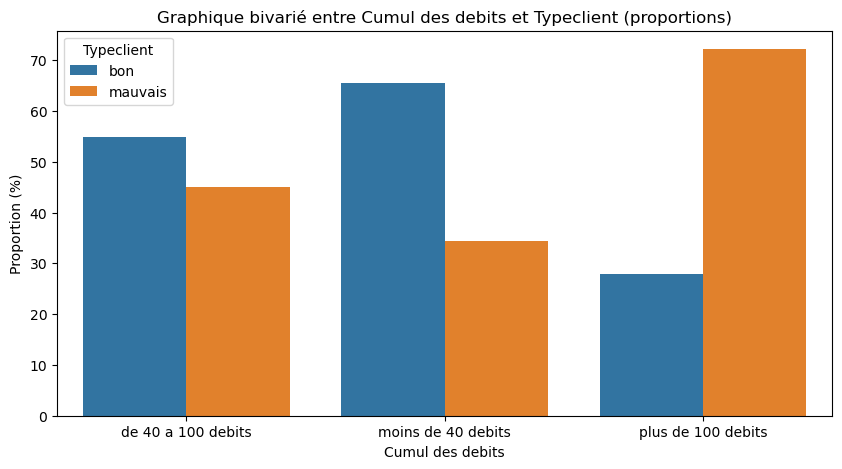

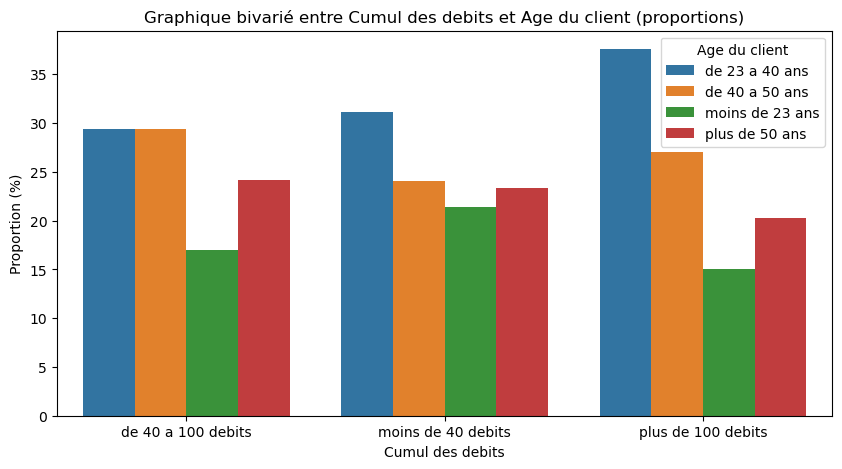

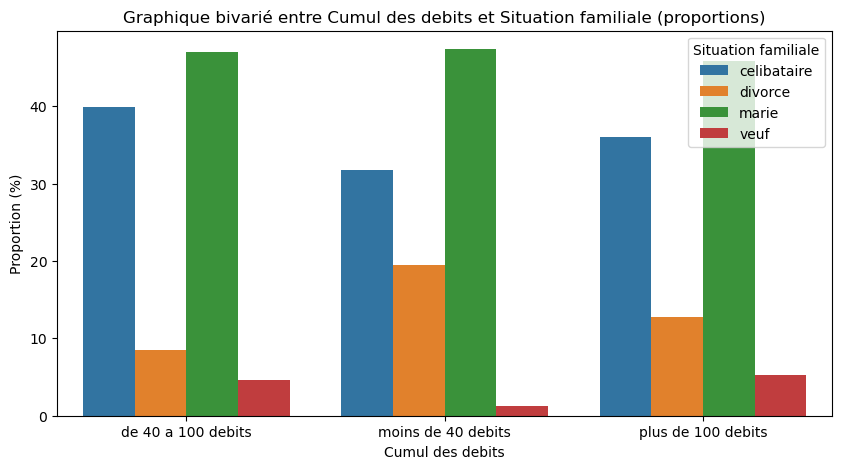

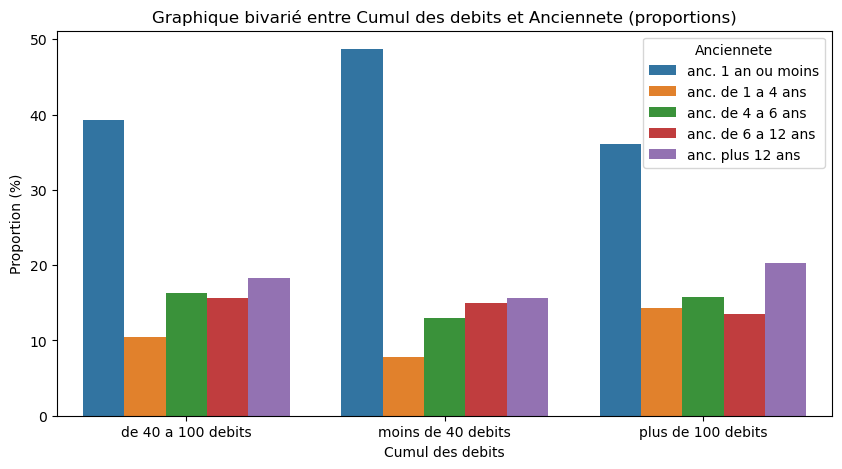

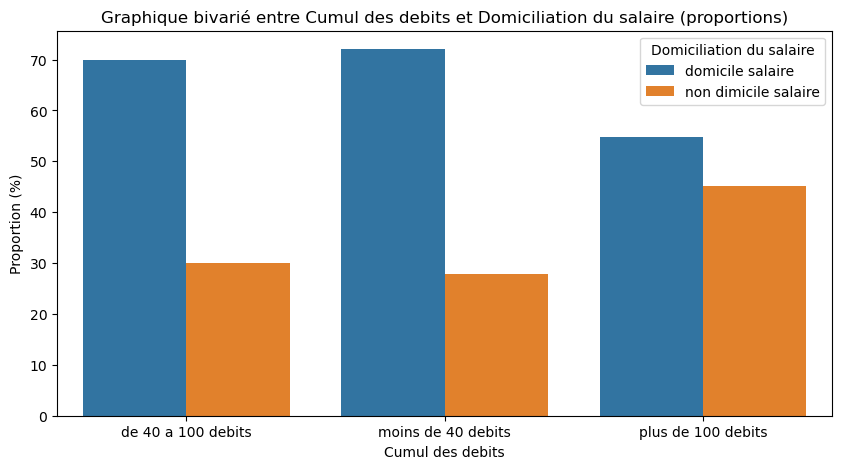

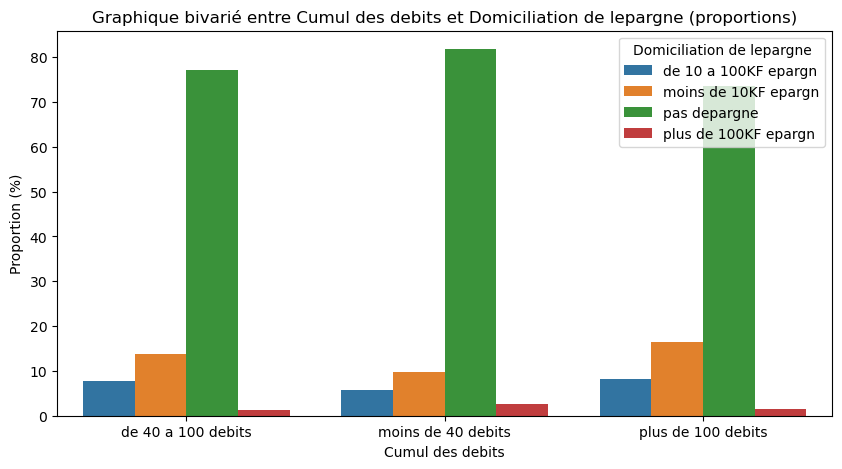

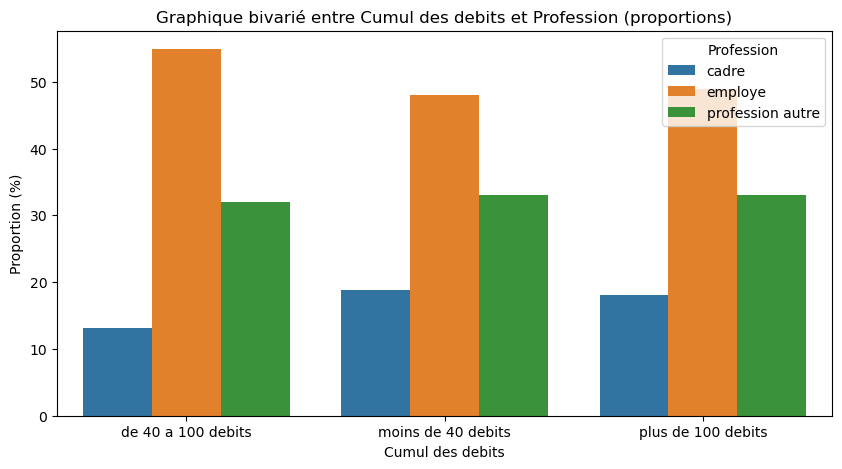

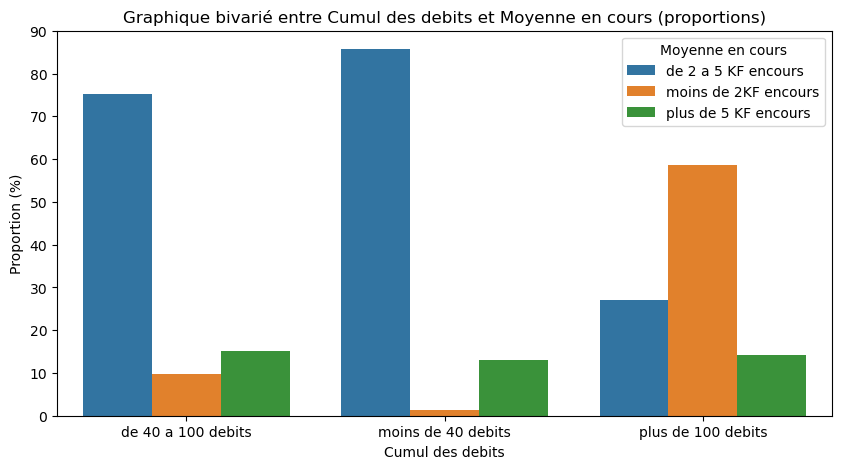

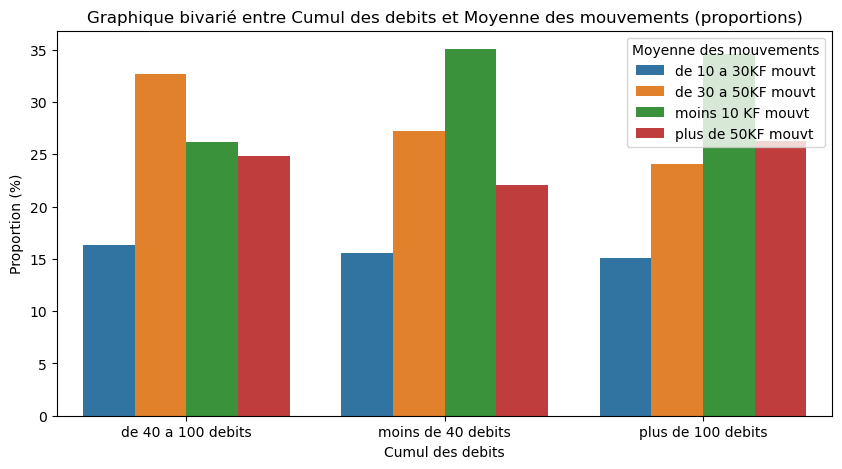

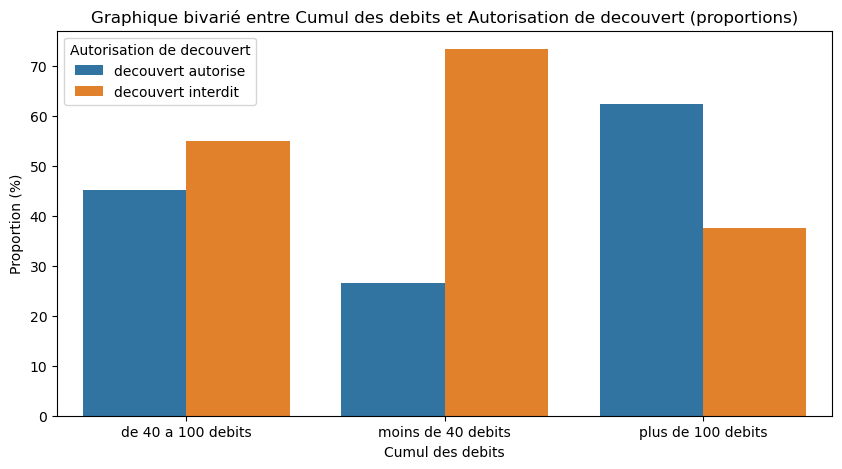

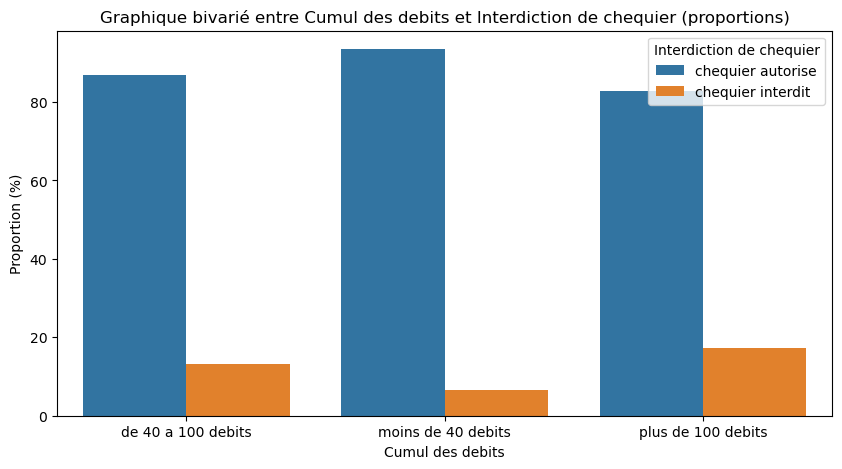

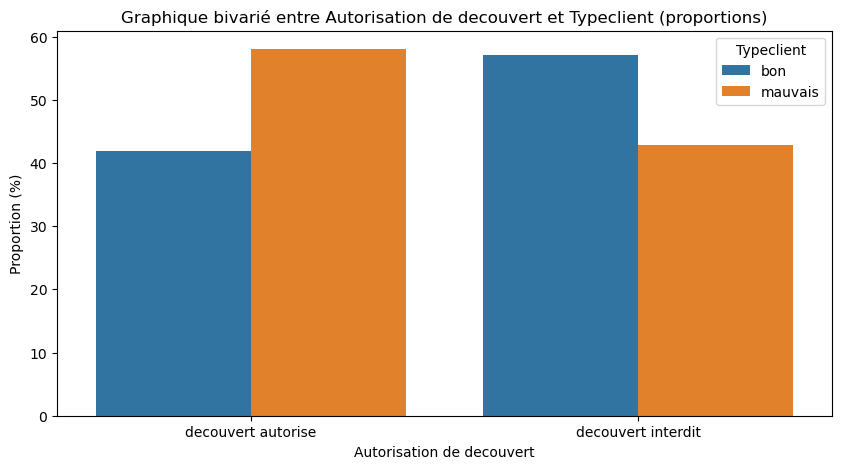

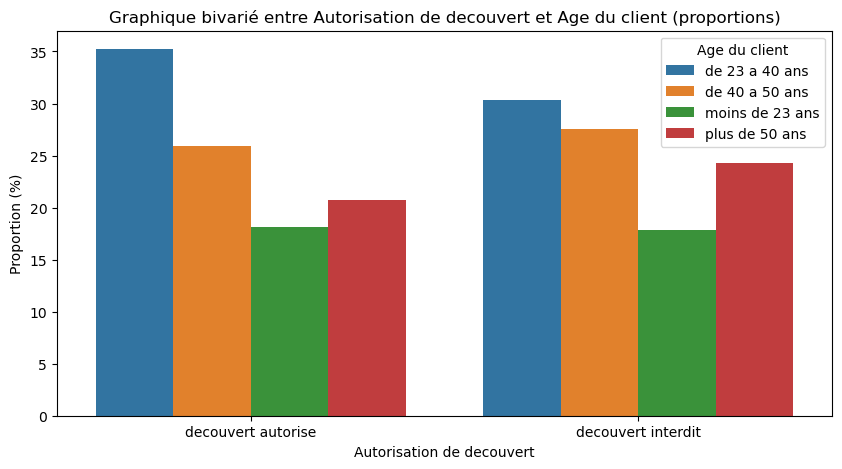

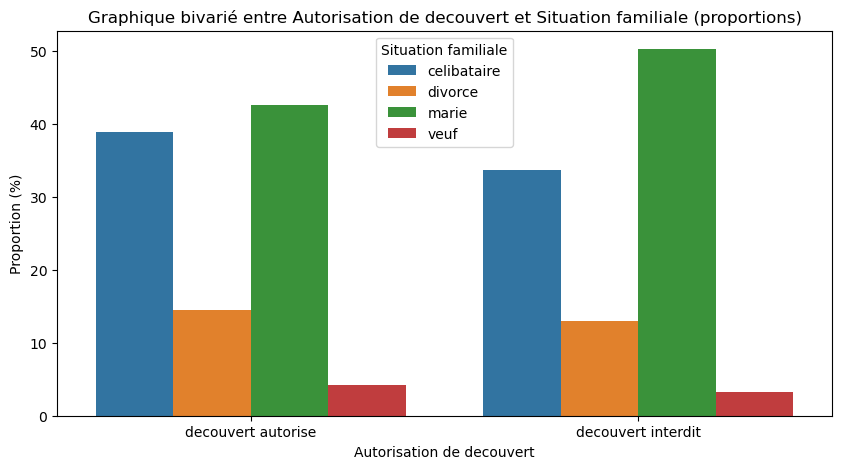

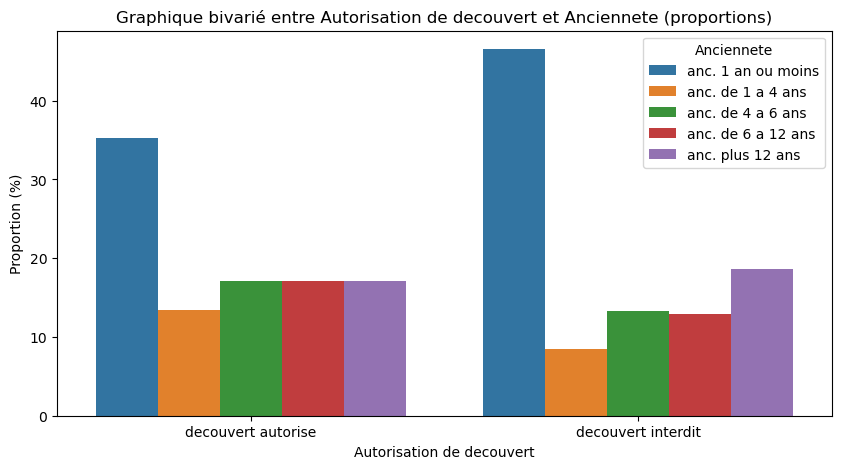

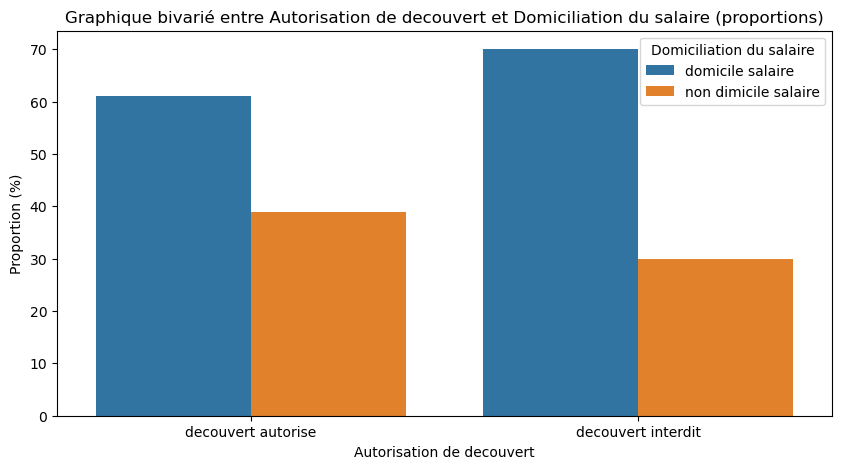

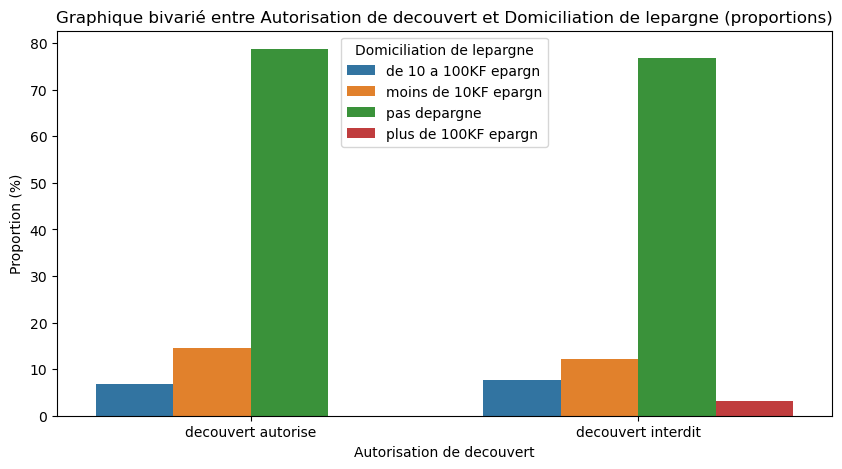

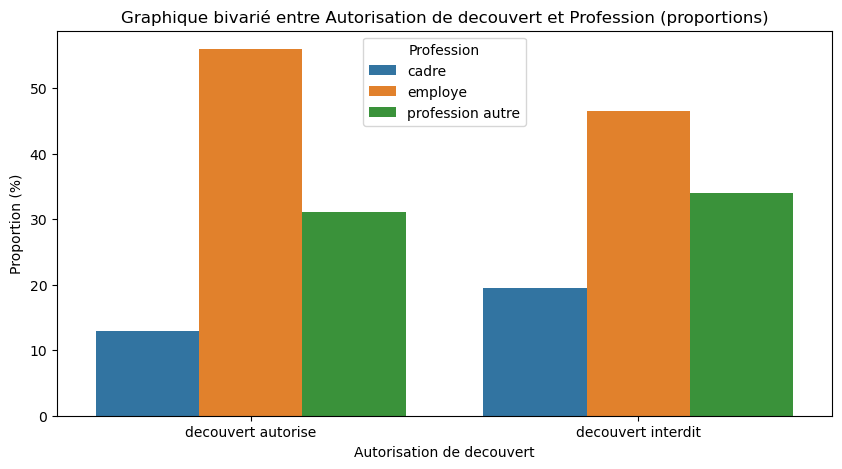

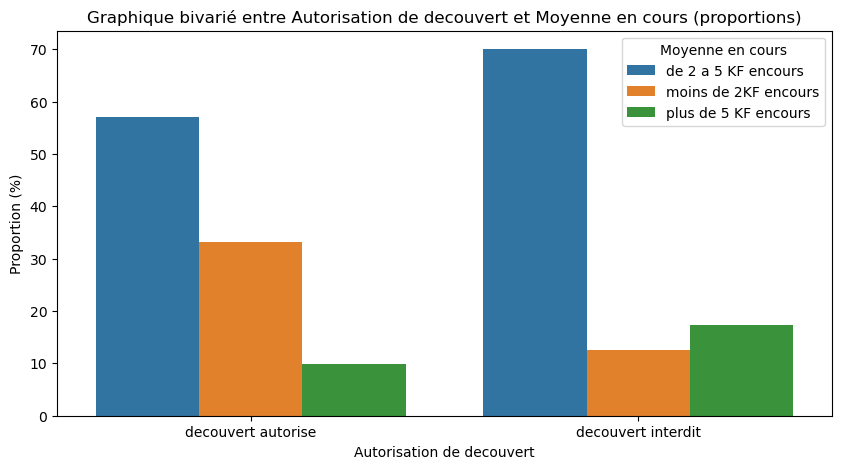

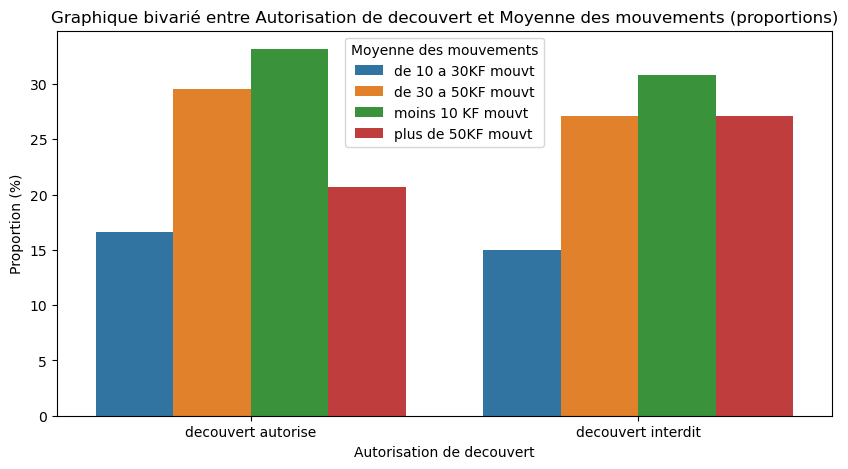

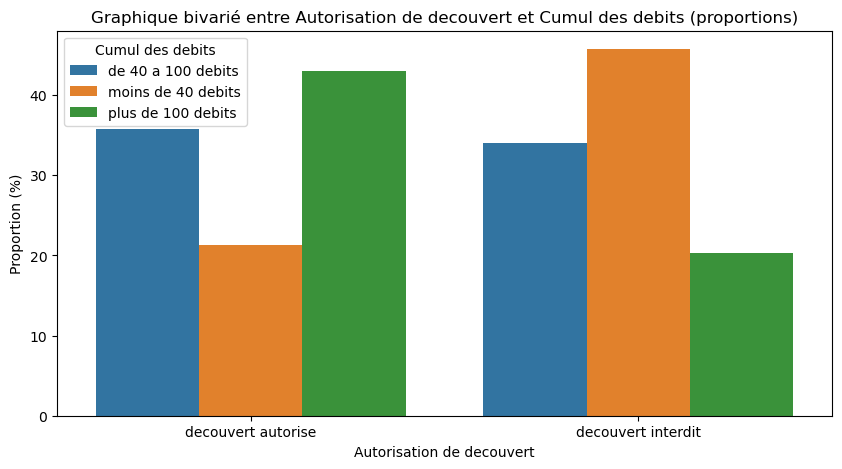

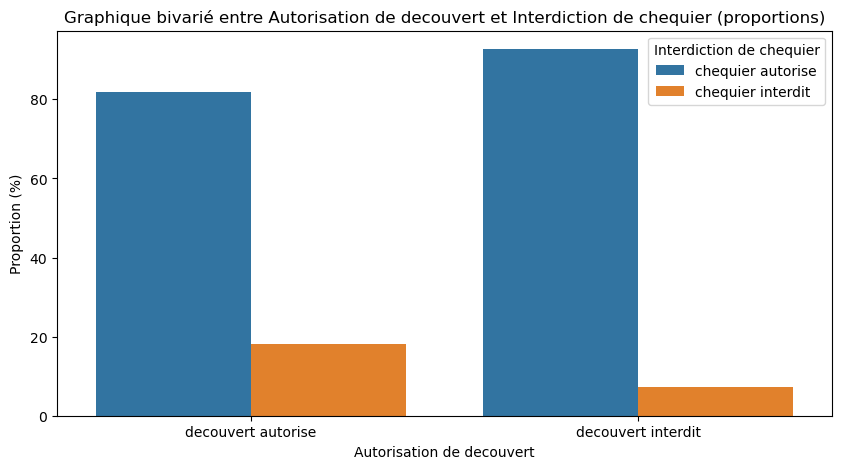

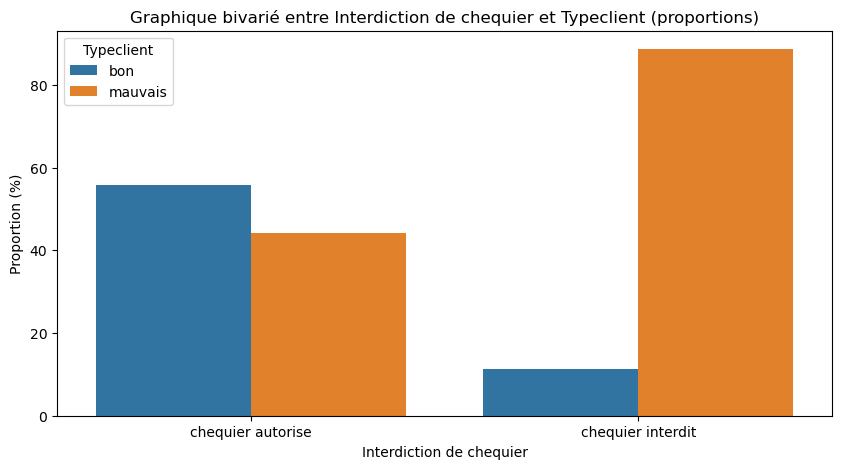

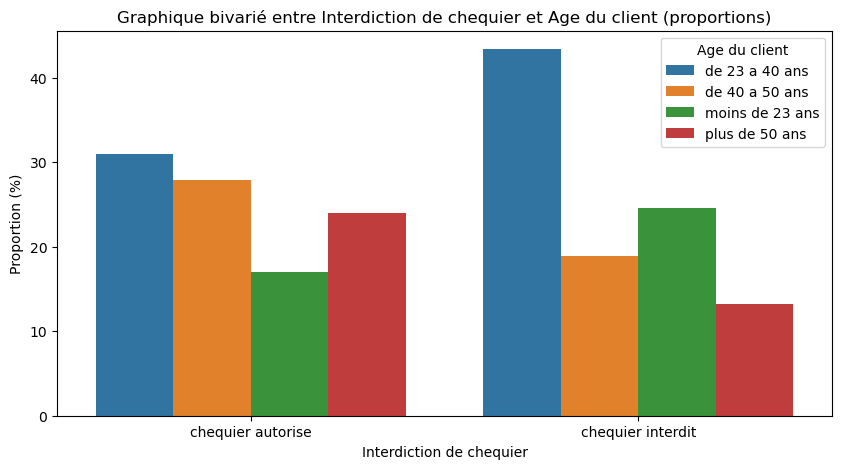

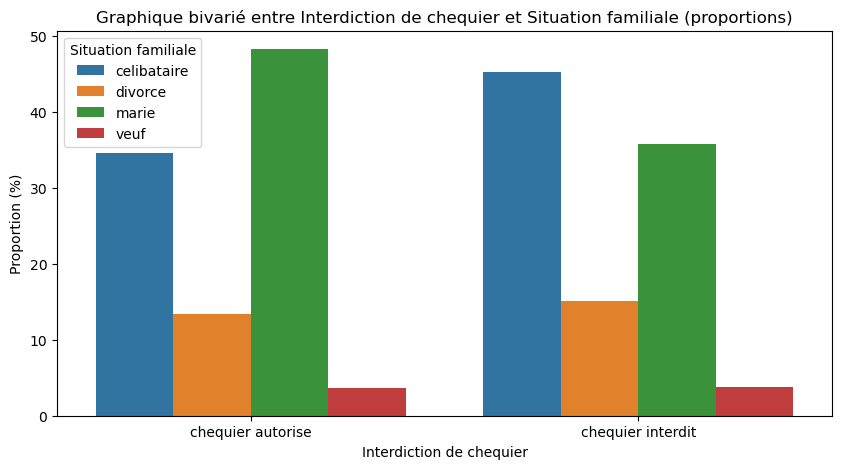

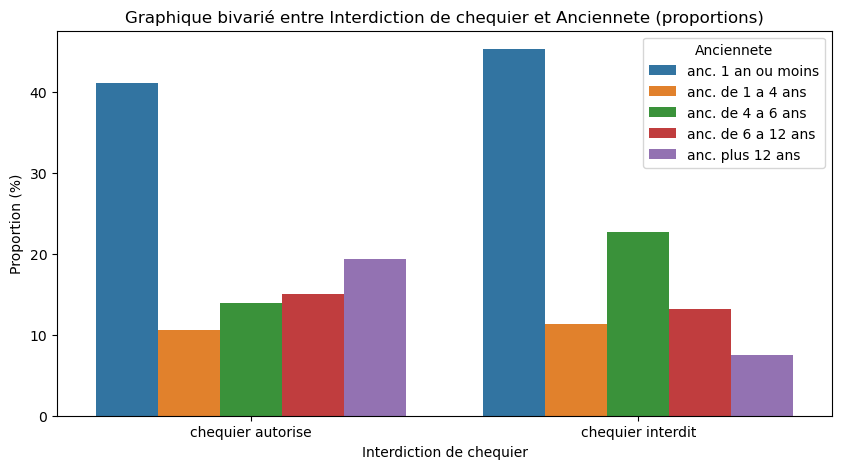

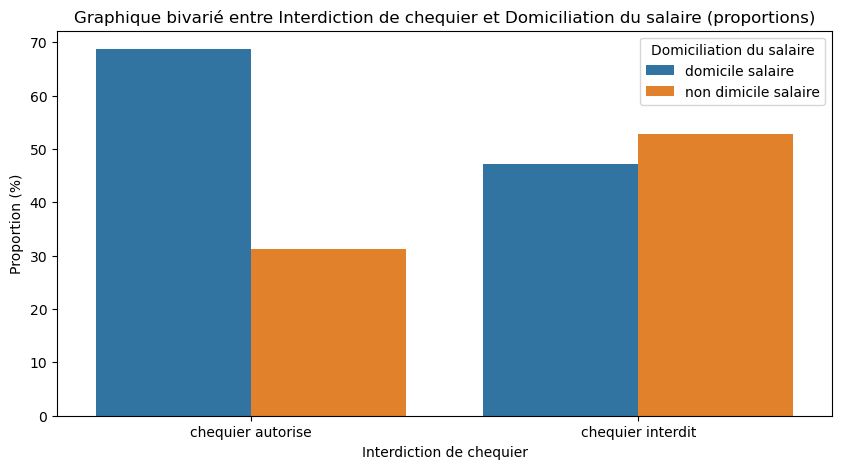

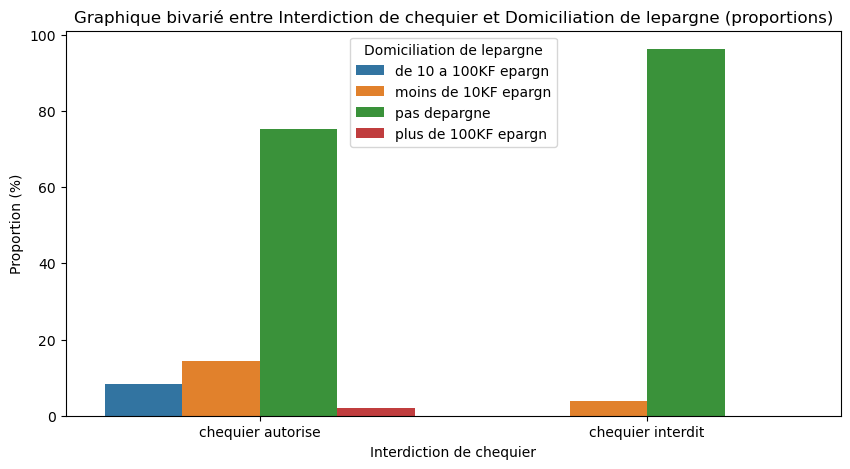

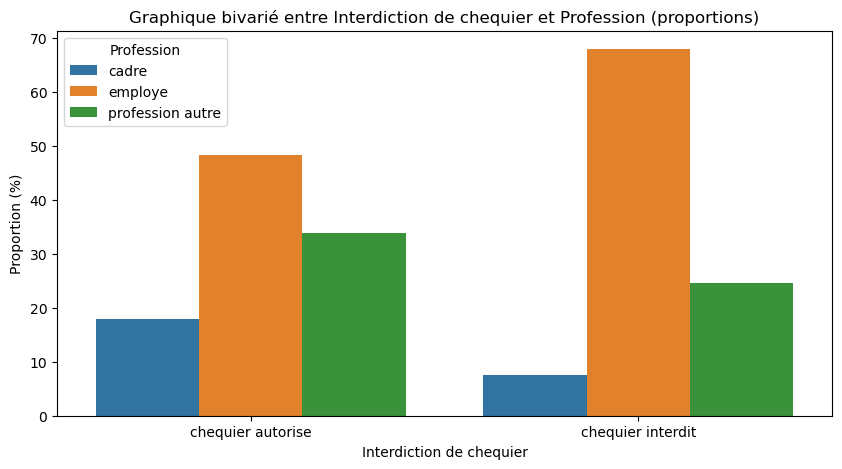

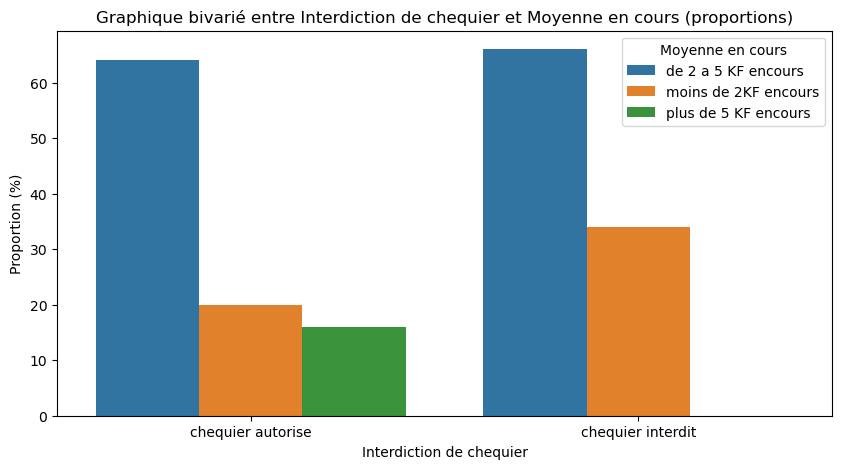

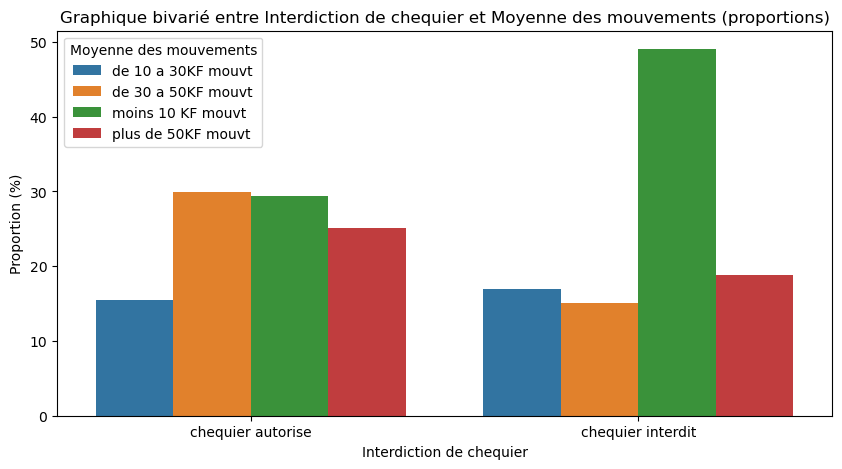

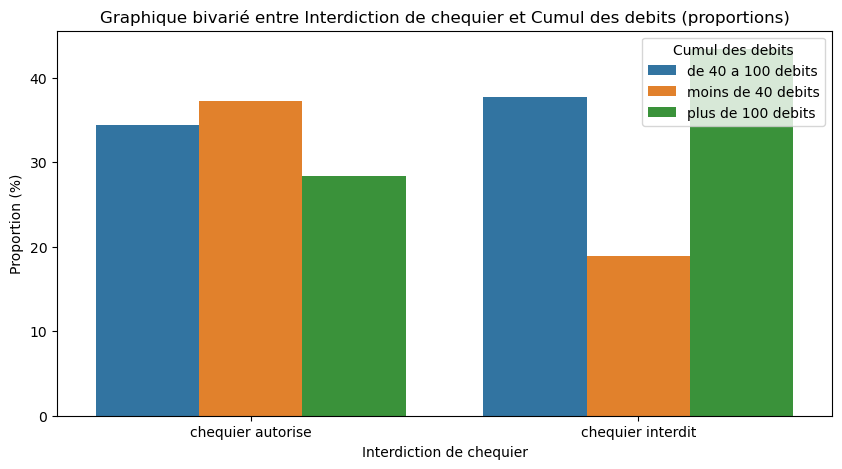

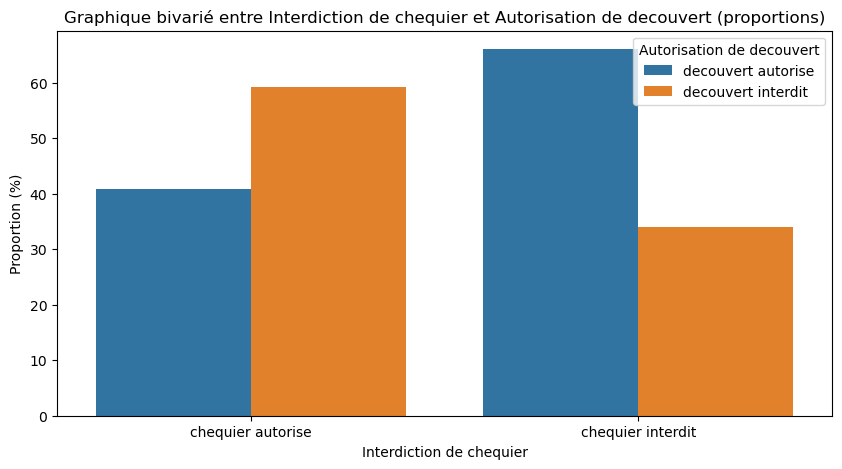

In [10]:
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            proportions = df.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()